In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden


(1, 256)
(1, 100)
(256, 100)


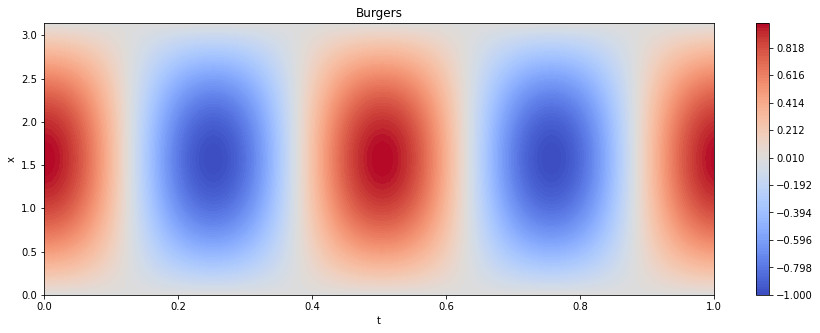

In [3]:
# Load the .mat file
mat_data = scipy.io.loadmat('EB.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [4]:
x1 = x.T
t1 = t.T

In [5]:
# Broadcasting to create the u_exact tensor with shape (100, 256)
u_exact = np.sin(x1)[:, np.newaxis] * np.cos(4 * np.pi * t1)

# Now, u_exact will have the shape (100, 256)

u_exact = u_exact.T
u_exact = torch.tensor(u_exact)
u_exact = torch.squeeze(u_exact)
u_exact.shape

torch.Size([100, 256])

In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 79
batch_size = 1
num_epochs = 200000

# Set random seed for reproducibility
torch.manual_seed(42)
u.shape

(256, 100)

In [7]:
input_data = u[:, 0:79]
target_data = u[:, 1:80]

test_data = u[ :, 79]
#test_target = u[:,80:100]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)


test data shape (256,)
input data shape (256, 79)
Target data shape (256, 79)
input tensor shape torch.Size([1, 79, 256])
Target tensor shape torch.Size([1, 79, 256])


In [8]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()
print(test_tensor.shape)

torch.Size([1, 1, 256])


In [9]:
# Create RNN instance
rnn = RNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = rnn(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.9f}')


Epoch: 10/200000, Loss: 0.040320728
Epoch: 20/200000, Loss: 0.014570242
Epoch: 30/200000, Loss: 0.007364940
Epoch: 40/200000, Loss: 0.003070729
Epoch: 50/200000, Loss: 0.001580620
Epoch: 60/200000, Loss: 0.000898173
Epoch: 70/200000, Loss: 0.000683648
Epoch: 80/200000, Loss: 0.000568610
Epoch: 90/200000, Loss: 0.000509326
Epoch: 100/200000, Loss: 0.005917401
Epoch: 110/200000, Loss: 0.000707892
Epoch: 120/200000, Loss: 0.000652517
Epoch: 130/200000, Loss: 0.000468536
Epoch: 140/200000, Loss: 0.000389212
Epoch: 150/200000, Loss: 0.000359459
Epoch: 160/200000, Loss: 0.000331678
Epoch: 170/200000, Loss: 0.000311361
Epoch: 180/200000, Loss: 0.000293447
Epoch: 190/200000, Loss: 0.000278122
Epoch: 200/200000, Loss: 0.000264172
Epoch: 210/200000, Loss: 0.000251405
Epoch: 220/200000, Loss: 0.000239593
Epoch: 230/200000, Loss: 0.000228565
Epoch: 240/200000, Loss: 0.000218947
Epoch: 250/200000, Loss: 0.002665089
Epoch: 260/200000, Loss: 0.000608894
Epoch: 270/200000, Loss: 0.000312540
Epoch: 280

Epoch: 2210/200000, Loss: 0.000037650
Epoch: 2220/200000, Loss: 0.000021600
Epoch: 2230/200000, Loss: 0.000013132
Epoch: 2240/200000, Loss: 0.000010107
Epoch: 2250/200000, Loss: 0.000008416
Epoch: 2260/200000, Loss: 0.000007651
Epoch: 2270/200000, Loss: 0.000007193
Epoch: 2280/200000, Loss: 0.000021062
Epoch: 2290/200000, Loss: 0.000291539
Epoch: 2300/200000, Loss: 0.000074262
Epoch: 2310/200000, Loss: 0.000041081
Epoch: 2320/200000, Loss: 0.000024320
Epoch: 2330/200000, Loss: 0.000013492
Epoch: 2340/200000, Loss: 0.000008644
Epoch: 2350/200000, Loss: 0.000008542
Epoch: 2360/200000, Loss: 0.000096756
Epoch: 2370/200000, Loss: 0.000114780
Epoch: 2380/200000, Loss: 0.000042938
Epoch: 2390/200000, Loss: 0.000023099
Epoch: 2400/200000, Loss: 0.000016597
Epoch: 2410/200000, Loss: 0.000010627
Epoch: 2420/200000, Loss: 0.000008504
Epoch: 2430/200000, Loss: 0.000007237
Epoch: 2440/200000, Loss: 0.000007511
Epoch: 2450/200000, Loss: 0.000208946
Epoch: 2460/200000, Loss: 0.000132489
Epoch: 2470/

Epoch: 4390/200000, Loss: 0.000089061
Epoch: 4400/200000, Loss: 0.000078232
Epoch: 4410/200000, Loss: 0.000082692
Epoch: 4420/200000, Loss: 0.000087483
Epoch: 4430/200000, Loss: 0.000065773
Epoch: 4440/200000, Loss: 0.000081312
Epoch: 4450/200000, Loss: 0.000062971
Epoch: 4460/200000, Loss: 0.000075965
Epoch: 4470/200000, Loss: 0.000063787
Epoch: 4480/200000, Loss: 0.000061135
Epoch: 4490/200000, Loss: 0.000092615
Epoch: 4500/200000, Loss: 0.000109458
Epoch: 4510/200000, Loss: 0.000108176
Epoch: 4520/200000, Loss: 0.000083067
Epoch: 4530/200000, Loss: 0.000073310
Epoch: 4540/200000, Loss: 0.000054412
Epoch: 4550/200000, Loss: 0.000157642
Epoch: 4560/200000, Loss: 0.000053607
Epoch: 4570/200000, Loss: 0.000073460
Epoch: 4580/200000, Loss: 0.000149383
Epoch: 4590/200000, Loss: 0.000087454
Epoch: 4600/200000, Loss: 0.000099924
Epoch: 4610/200000, Loss: 0.000108915
Epoch: 4620/200000, Loss: 0.000080192
Epoch: 4630/200000, Loss: 0.000051850
Epoch: 4640/200000, Loss: 0.000174319
Epoch: 4650/

Epoch: 6550/200000, Loss: 0.000282024
Epoch: 6560/200000, Loss: 0.000255012
Epoch: 6570/200000, Loss: 0.000300941
Epoch: 6580/200000, Loss: 0.000247302
Epoch: 6590/200000, Loss: 0.000244613
Epoch: 6600/200000, Loss: 0.000306104
Epoch: 6610/200000, Loss: 0.000647957
Epoch: 6620/200000, Loss: 0.000549853
Epoch: 6630/200000, Loss: 0.000344825
Epoch: 6640/200000, Loss: 0.000226634
Epoch: 6650/200000, Loss: 0.000255701
Epoch: 6660/200000, Loss: 0.000242255
Epoch: 6670/200000, Loss: 0.000250551
Epoch: 6680/200000, Loss: 0.000262711
Epoch: 6690/200000, Loss: 0.000342104
Epoch: 6700/200000, Loss: 0.000541252
Epoch: 6710/200000, Loss: 0.000520892
Epoch: 6720/200000, Loss: 0.000267468
Epoch: 6730/200000, Loss: 0.000223304
Epoch: 6740/200000, Loss: 0.000241147
Epoch: 6750/200000, Loss: 0.000232459
Epoch: 6760/200000, Loss: 0.000306842
Epoch: 6770/200000, Loss: 0.000370037
Epoch: 6780/200000, Loss: 0.000217687
Epoch: 6790/200000, Loss: 0.000210540
Epoch: 6800/200000, Loss: 0.000245006
Epoch: 6810/

Epoch: 8720/200000, Loss: 0.000126947
Epoch: 8730/200000, Loss: 0.000083797
Epoch: 8740/200000, Loss: 0.000096134
Epoch: 8750/200000, Loss: 0.000255228
Epoch: 8760/200000, Loss: 0.000077509
Epoch: 8770/200000, Loss: 0.000368430
Epoch: 8780/200000, Loss: 0.000249328
Epoch: 8790/200000, Loss: 0.000082511
Epoch: 8800/200000, Loss: 0.000103943
Epoch: 8810/200000, Loss: 0.000066659
Epoch: 8820/200000, Loss: 0.000196356
Epoch: 8830/200000, Loss: 0.000089512
Epoch: 8840/200000, Loss: 0.000097774
Epoch: 8850/200000, Loss: 0.000106745
Epoch: 8860/200000, Loss: 0.000134410
Epoch: 8870/200000, Loss: 0.000113872
Epoch: 8880/200000, Loss: 0.000084207
Epoch: 8890/200000, Loss: 0.000456627
Epoch: 8900/200000, Loss: 0.000238533
Epoch: 8910/200000, Loss: 0.000086504
Epoch: 8920/200000, Loss: 0.000077613
Epoch: 8930/200000, Loss: 0.000118365
Epoch: 8940/200000, Loss: 0.000197498
Epoch: 8950/200000, Loss: 0.000074111
Epoch: 8960/200000, Loss: 0.000074145
Epoch: 8970/200000, Loss: 0.000695282
Epoch: 8980/

Epoch: 10880/200000, Loss: 0.000193323
Epoch: 10890/200000, Loss: 0.000194642
Epoch: 10900/200000, Loss: 0.000195831
Epoch: 10910/200000, Loss: 0.000192742
Epoch: 10920/200000, Loss: 0.000191206
Epoch: 10930/200000, Loss: 0.000189271
Epoch: 10940/200000, Loss: 0.000186754
Epoch: 10950/200000, Loss: 0.000185141
Epoch: 10960/200000, Loss: 0.000184795
Epoch: 10970/200000, Loss: 0.000184350
Epoch: 10980/200000, Loss: 0.000184598
Epoch: 10990/200000, Loss: 0.000183932
Epoch: 11000/200000, Loss: 0.000184065
Epoch: 11010/200000, Loss: 0.000183791
Epoch: 11020/200000, Loss: 0.000182255
Epoch: 11030/200000, Loss: 0.000181400
Epoch: 11040/200000, Loss: 0.000180350
Epoch: 11050/200000, Loss: 0.000180461
Epoch: 11060/200000, Loss: 0.000181546
Epoch: 11070/200000, Loss: 0.000179601
Epoch: 11080/200000, Loss: 0.000178121
Epoch: 11090/200000, Loss: 0.000177606
Epoch: 11100/200000, Loss: 0.000177600
Epoch: 11110/200000, Loss: 0.000176883
Epoch: 11120/200000, Loss: 0.000176621
Epoch: 11130/200000, Loss

Epoch: 13010/200000, Loss: 0.000148981
Epoch: 13020/200000, Loss: 0.000130247
Epoch: 13030/200000, Loss: 0.000315170
Epoch: 13040/200000, Loss: 0.000123152
Epoch: 13050/200000, Loss: 0.000277762
Epoch: 13060/200000, Loss: 0.000115539
Epoch: 13070/200000, Loss: 0.000291956
Epoch: 13080/200000, Loss: 0.000107668
Epoch: 13090/200000, Loss: 0.000291710
Epoch: 13100/200000, Loss: 0.000108930
Epoch: 13110/200000, Loss: 0.000266037
Epoch: 13120/200000, Loss: 0.000106082
Epoch: 13130/200000, Loss: 0.000215768
Epoch: 13140/200000, Loss: 0.000116518
Epoch: 13150/200000, Loss: 0.000227677
Epoch: 13160/200000, Loss: 0.000124770
Epoch: 13170/200000, Loss: 0.000117451
Epoch: 13180/200000, Loss: 0.000315480
Epoch: 13190/200000, Loss: 0.000203554
Epoch: 13200/200000, Loss: 0.000148835
Epoch: 13210/200000, Loss: 0.000113331
Epoch: 13220/200000, Loss: 0.000344872
Epoch: 13230/200000, Loss: 0.000118263
Epoch: 13240/200000, Loss: 0.000239324
Epoch: 13250/200000, Loss: 0.000101827
Epoch: 13260/200000, Loss

Epoch: 15130/200000, Loss: 0.000756408
Epoch: 15140/200000, Loss: 0.000755329
Epoch: 15150/200000, Loss: 0.000753589
Epoch: 15160/200000, Loss: 0.000745603
Epoch: 15170/200000, Loss: 0.000735608
Epoch: 15180/200000, Loss: 0.000800857
Epoch: 15190/200000, Loss: 0.000877450
Epoch: 15200/200000, Loss: 0.000762633
Epoch: 15210/200000, Loss: 0.000699594
Epoch: 15220/200000, Loss: 0.000895496
Epoch: 15230/200000, Loss: 0.000833792
Epoch: 15240/200000, Loss: 0.000692376
Epoch: 15250/200000, Loss: 0.000582683
Epoch: 15260/200000, Loss: 0.000640845
Epoch: 15270/200000, Loss: 0.000655328
Epoch: 15280/200000, Loss: 0.000682165
Epoch: 15290/200000, Loss: 0.000641854
Epoch: 15300/200000, Loss: 0.000579952
Epoch: 15310/200000, Loss: 0.000577810
Epoch: 15320/200000, Loss: 0.000603570
Epoch: 15330/200000, Loss: 0.000737044
Epoch: 15340/200000, Loss: 0.000550384
Epoch: 15350/200000, Loss: 0.000562384
Epoch: 15360/200000, Loss: 0.000579730
Epoch: 15370/200000, Loss: 0.000593219
Epoch: 15380/200000, Loss

Epoch: 17260/200000, Loss: 0.000551538
Epoch: 17270/200000, Loss: 0.000581470
Epoch: 17280/200000, Loss: 0.000799902
Epoch: 17290/200000, Loss: 0.000486072
Epoch: 17300/200000, Loss: 0.000767582
Epoch: 17310/200000, Loss: 0.000470699
Epoch: 17320/200000, Loss: 0.000602694
Epoch: 17330/200000, Loss: 0.000524012
Epoch: 17340/200000, Loss: 0.000459513
Epoch: 17350/200000, Loss: 0.000514755
Epoch: 17360/200000, Loss: 0.000645777
Epoch: 17370/200000, Loss: 0.000523993
Epoch: 17380/200000, Loss: 0.000666630
Epoch: 17390/200000, Loss: 0.000454583
Epoch: 17400/200000, Loss: 0.000390967
Epoch: 17410/200000, Loss: 0.000347587
Epoch: 17420/200000, Loss: 0.000358823
Epoch: 17430/200000, Loss: 0.000541285
Epoch: 17440/200000, Loss: 0.000398090
Epoch: 17450/200000, Loss: 0.000344887
Epoch: 17460/200000, Loss: 0.000363898
Epoch: 17470/200000, Loss: 0.000325459
Epoch: 17480/200000, Loss: 0.000650447
Epoch: 17490/200000, Loss: 0.000486576
Epoch: 17500/200000, Loss: 0.000330864
Epoch: 17510/200000, Loss

Epoch: 19400/200000, Loss: 0.000295783
Epoch: 19410/200000, Loss: 0.000383843
Epoch: 19420/200000, Loss: 0.000283457
Epoch: 19430/200000, Loss: 0.000322051
Epoch: 19440/200000, Loss: 0.000538172
Epoch: 19450/200000, Loss: 0.000414389
Epoch: 19460/200000, Loss: 0.000314283
Epoch: 19470/200000, Loss: 0.000382862
Epoch: 19480/200000, Loss: 0.000292059
Epoch: 19490/200000, Loss: 0.000389340
Epoch: 19500/200000, Loss: 0.000417701
Epoch: 19510/200000, Loss: 0.000299258
Epoch: 19520/200000, Loss: 0.000699651
Epoch: 19530/200000, Loss: 0.000562801
Epoch: 19540/200000, Loss: 0.000284882
Epoch: 19550/200000, Loss: 0.000387229
Epoch: 19560/200000, Loss: 0.000299811
Epoch: 19570/200000, Loss: 0.000314082
Epoch: 19580/200000, Loss: 0.000591247
Epoch: 19590/200000, Loss: 0.000608484
Epoch: 19600/200000, Loss: 0.000305549
Epoch: 19610/200000, Loss: 0.000350853
Epoch: 19620/200000, Loss: 0.000281963
Epoch: 19630/200000, Loss: 0.000279158
Epoch: 19640/200000, Loss: 0.000297620
Epoch: 19650/200000, Loss

Epoch: 21520/200000, Loss: 0.000405302
Epoch: 21530/200000, Loss: 0.000258212
Epoch: 21540/200000, Loss: 0.000358687
Epoch: 21550/200000, Loss: 0.000316920
Epoch: 21560/200000, Loss: 0.000590280
Epoch: 21570/200000, Loss: 0.000310604
Epoch: 21580/200000, Loss: 0.000377138
Epoch: 21590/200000, Loss: 0.000264608
Epoch: 21600/200000, Loss: 0.000679988
Epoch: 21610/200000, Loss: 0.000434267
Epoch: 21620/200000, Loss: 0.000260374
Epoch: 21630/200000, Loss: 0.000358850
Epoch: 21640/200000, Loss: 0.000275785
Epoch: 21650/200000, Loss: 0.000283047
Epoch: 21660/200000, Loss: 0.000694402
Epoch: 21670/200000, Loss: 0.000608390
Epoch: 21680/200000, Loss: 0.000362057
Epoch: 21690/200000, Loss: 0.000256829
Epoch: 21700/200000, Loss: 0.000388568
Epoch: 21710/200000, Loss: 0.000272276
Epoch: 21720/200000, Loss: 0.000545365
Epoch: 21730/200000, Loss: 0.000296503
Epoch: 21740/200000, Loss: 0.000349117
Epoch: 21750/200000, Loss: 0.000315659
Epoch: 21760/200000, Loss: 0.000442656
Epoch: 21770/200000, Loss

Epoch: 23640/200000, Loss: 0.000435903
Epoch: 23650/200000, Loss: 0.000251129
Epoch: 23660/200000, Loss: 0.000451168
Epoch: 23670/200000, Loss: 0.000241081
Epoch: 23680/200000, Loss: 0.000484107
Epoch: 23690/200000, Loss: 0.000240074
Epoch: 23700/200000, Loss: 0.000478506
Epoch: 23710/200000, Loss: 0.000240704
Epoch: 23720/200000, Loss: 0.000508731
Epoch: 23730/200000, Loss: 0.000243417
Epoch: 23740/200000, Loss: 0.000494432
Epoch: 23750/200000, Loss: 0.000249968
Epoch: 23760/200000, Loss: 0.000507203
Epoch: 23770/200000, Loss: 0.000257326
Epoch: 23780/200000, Loss: 0.000483727
Epoch: 23790/200000, Loss: 0.000258701
Epoch: 23800/200000, Loss: 0.000529670
Epoch: 23810/200000, Loss: 0.000264490
Epoch: 23820/200000, Loss: 0.000477687
Epoch: 23830/200000, Loss: 0.000278000
Epoch: 23840/200000, Loss: 0.000457918
Epoch: 23850/200000, Loss: 0.000288120
Epoch: 23860/200000, Loss: 0.000450345
Epoch: 23870/200000, Loss: 0.000279236
Epoch: 23880/200000, Loss: 0.000502405
Epoch: 23890/200000, Loss

Epoch: 25760/200000, Loss: 0.000228874
Epoch: 25770/200000, Loss: 0.000394346
Epoch: 25780/200000, Loss: 0.000300205
Epoch: 25790/200000, Loss: 0.000616233
Epoch: 25800/200000, Loss: 0.000434556
Epoch: 25810/200000, Loss: 0.000269789
Epoch: 25820/200000, Loss: 0.000258338
Epoch: 25830/200000, Loss: 0.000393398
Epoch: 25840/200000, Loss: 0.000325078
Epoch: 25850/200000, Loss: 0.000230366
Epoch: 25860/200000, Loss: 0.000350210
Epoch: 25870/200000, Loss: 0.000259315
Epoch: 25880/200000, Loss: 0.000228229
Epoch: 25890/200000, Loss: 0.000257455
Epoch: 25900/200000, Loss: 0.001028821
Epoch: 25910/200000, Loss: 0.000843988
Epoch: 25920/200000, Loss: 0.000511682
Epoch: 25930/200000, Loss: 0.000333088
Epoch: 25940/200000, Loss: 0.000301969
Epoch: 25950/200000, Loss: 0.000256849
Epoch: 25960/200000, Loss: 0.000250488
Epoch: 25970/200000, Loss: 0.000230947
Epoch: 25980/200000, Loss: 0.000296907
Epoch: 25990/200000, Loss: 0.000486552
Epoch: 26000/200000, Loss: 0.000674487
Epoch: 26010/200000, Loss

Epoch: 27880/200000, Loss: 0.000487896
Epoch: 27890/200000, Loss: 0.000311901
Epoch: 27900/200000, Loss: 0.000220799
Epoch: 27910/200000, Loss: 0.000275698
Epoch: 27920/200000, Loss: 0.000223201
Epoch: 27930/200000, Loss: 0.000260775
Epoch: 27940/200000, Loss: 0.000418111
Epoch: 27950/200000, Loss: 0.000270285
Epoch: 27960/200000, Loss: 0.000227592
Epoch: 27970/200000, Loss: 0.000307933
Epoch: 27980/200000, Loss: 0.000642610
Epoch: 27990/200000, Loss: 0.000361064
Epoch: 28000/200000, Loss: 0.000230780
Epoch: 28010/200000, Loss: 0.000502891
Epoch: 28020/200000, Loss: 0.000483539
Epoch: 28030/200000, Loss: 0.000295116
Epoch: 28040/200000, Loss: 0.000229716
Epoch: 28050/200000, Loss: 0.000381221
Epoch: 28060/200000, Loss: 0.000318218
Epoch: 28070/200000, Loss: 0.000222609
Epoch: 28080/200000, Loss: 0.000319363
Epoch: 28090/200000, Loss: 0.000237647
Epoch: 28100/200000, Loss: 0.000231706
Epoch: 28110/200000, Loss: 0.000427666
Epoch: 28120/200000, Loss: 0.000359754
Epoch: 28130/200000, Loss

Epoch: 30000/200000, Loss: 0.000236357
Epoch: 30010/200000, Loss: 0.000305261
Epoch: 30020/200000, Loss: 0.000194338
Epoch: 30030/200000, Loss: 0.000190626
Epoch: 30040/200000, Loss: 0.000256906
Epoch: 30050/200000, Loss: 0.000729981
Epoch: 30060/200000, Loss: 0.000365522
Epoch: 30070/200000, Loss: 0.000205911
Epoch: 30080/200000, Loss: 0.000211489
Epoch: 30090/200000, Loss: 0.000296559
Epoch: 30100/200000, Loss: 0.000230231
Epoch: 30110/200000, Loss: 0.000194408
Epoch: 30120/200000, Loss: 0.000195866
Epoch: 30130/200000, Loss: 0.000229267
Epoch: 30140/200000, Loss: 0.000395486
Epoch: 30150/200000, Loss: 0.000265744
Epoch: 30160/200000, Loss: 0.000220042
Epoch: 30170/200000, Loss: 0.000313958
Epoch: 30180/200000, Loss: 0.000266867
Epoch: 30190/200000, Loss: 0.000198920
Epoch: 30200/200000, Loss: 0.000206015
Epoch: 30210/200000, Loss: 0.000438325
Epoch: 30220/200000, Loss: 0.000273955
Epoch: 30230/200000, Loss: 0.000431784
Epoch: 30240/200000, Loss: 0.000285550
Epoch: 30250/200000, Loss

Epoch: 32110/200000, Loss: 0.000300366
Epoch: 32120/200000, Loss: 0.000220064
Epoch: 32130/200000, Loss: 0.000263465
Epoch: 32140/200000, Loss: 0.000502121
Epoch: 32150/200000, Loss: 0.000186363
Epoch: 32160/200000, Loss: 0.000296267
Epoch: 32170/200000, Loss: 0.000253218
Epoch: 32180/200000, Loss: 0.000193918
Epoch: 32190/200000, Loss: 0.000216627
Epoch: 32200/200000, Loss: 0.000526304
Epoch: 32210/200000, Loss: 0.000202476
Epoch: 32220/200000, Loss: 0.000326464
Epoch: 32230/200000, Loss: 0.000191041
Epoch: 32240/200000, Loss: 0.000236344
Epoch: 32250/200000, Loss: 0.000282618
Epoch: 32260/200000, Loss: 0.000312956
Epoch: 32270/200000, Loss: 0.000237077
Epoch: 32280/200000, Loss: 0.000211778
Epoch: 32290/200000, Loss: 0.000295900
Epoch: 32300/200000, Loss: 0.000526236
Epoch: 32310/200000, Loss: 0.000239877
Epoch: 32320/200000, Loss: 0.000268979
Epoch: 32330/200000, Loss: 0.000199448
Epoch: 32340/200000, Loss: 0.000195867
Epoch: 32350/200000, Loss: 0.000344098
Epoch: 32360/200000, Loss

Epoch: 34230/200000, Loss: 0.000262836
Epoch: 34240/200000, Loss: 0.000188181
Epoch: 34250/200000, Loss: 0.000219214
Epoch: 34260/200000, Loss: 0.000195967
Epoch: 34270/200000, Loss: 0.000213640
Epoch: 34280/200000, Loss: 0.000243753
Epoch: 34290/200000, Loss: 0.000359292
Epoch: 34300/200000, Loss: 0.000246594
Epoch: 34310/200000, Loss: 0.000186229
Epoch: 34320/200000, Loss: 0.000182186
Epoch: 34330/200000, Loss: 0.000291401
Epoch: 34340/200000, Loss: 0.000615442
Epoch: 34350/200000, Loss: 0.000577603
Epoch: 34360/200000, Loss: 0.000473927
Epoch: 34370/200000, Loss: 0.000413185
Epoch: 34380/200000, Loss: 0.000327288
Epoch: 34390/200000, Loss: 0.000240595
Epoch: 34400/200000, Loss: 0.000182833
Epoch: 34410/200000, Loss: 0.000191905
Epoch: 34420/200000, Loss: 0.000214445
Epoch: 34430/200000, Loss: 0.000177316
Epoch: 34440/200000, Loss: 0.000198829
Epoch: 34450/200000, Loss: 0.000236746
Epoch: 34460/200000, Loss: 0.000345875
Epoch: 34470/200000, Loss: 0.000264445
Epoch: 34480/200000, Loss

Epoch: 36370/200000, Loss: 0.000204542
Epoch: 36380/200000, Loss: 0.000354946
Epoch: 36390/200000, Loss: 0.000241782
Epoch: 36400/200000, Loss: 0.000172493
Epoch: 36410/200000, Loss: 0.000213017
Epoch: 36420/200000, Loss: 0.000569350
Epoch: 36430/200000, Loss: 0.000183022
Epoch: 36440/200000, Loss: 0.000293825
Epoch: 36450/200000, Loss: 0.000172810
Epoch: 36460/200000, Loss: 0.000196561
Epoch: 36470/200000, Loss: 0.000390582
Epoch: 36480/200000, Loss: 0.000232279
Epoch: 36490/200000, Loss: 0.000237783
Epoch: 36500/200000, Loss: 0.000303320
Epoch: 36510/200000, Loss: 0.000201019
Epoch: 36520/200000, Loss: 0.000186627
Epoch: 36530/200000, Loss: 0.000307506
Epoch: 36540/200000, Loss: 0.000400967
Epoch: 36550/200000, Loss: 0.000272017
Epoch: 36560/200000, Loss: 0.000220067
Epoch: 36570/200000, Loss: 0.000172363
Epoch: 36580/200000, Loss: 0.000192447
Epoch: 36590/200000, Loss: 0.000502320
Epoch: 36600/200000, Loss: 0.000180600
Epoch: 36610/200000, Loss: 0.000324742
Epoch: 36620/200000, Loss

Epoch: 38490/200000, Loss: 0.000157837
Epoch: 38500/200000, Loss: 0.000294560
Epoch: 38510/200000, Loss: 0.000215063
Epoch: 38520/200000, Loss: 0.000162137
Epoch: 38530/200000, Loss: 0.000308583
Epoch: 38540/200000, Loss: 0.000208150
Epoch: 38550/200000, Loss: 0.000173395
Epoch: 38560/200000, Loss: 0.000322444
Epoch: 38570/200000, Loss: 0.000177789
Epoch: 38580/200000, Loss: 0.000173654
Epoch: 38590/200000, Loss: 0.000332133
Epoch: 38600/200000, Loss: 0.000173894
Epoch: 38610/200000, Loss: 0.000183803
Epoch: 38620/200000, Loss: 0.000338242
Epoch: 38630/200000, Loss: 0.000158446
Epoch: 38640/200000, Loss: 0.000184178
Epoch: 38650/200000, Loss: 0.000349950
Epoch: 38660/200000, Loss: 0.000156473
Epoch: 38670/200000, Loss: 0.000195437
Epoch: 38680/200000, Loss: 0.000346155
Epoch: 38690/200000, Loss: 0.000148700
Epoch: 38700/200000, Loss: 0.000192842
Epoch: 38710/200000, Loss: 0.000355963
Epoch: 38720/200000, Loss: 0.000147102
Epoch: 38730/200000, Loss: 0.000204977
Epoch: 38740/200000, Loss

Epoch: 40610/200000, Loss: 0.000155134
Epoch: 40620/200000, Loss: 0.000300076
Epoch: 40630/200000, Loss: 0.000258697
Epoch: 40640/200000, Loss: 0.000118189
Epoch: 40650/200000, Loss: 0.000110603
Epoch: 40660/200000, Loss: 0.000111702
Epoch: 40670/200000, Loss: 0.000111003
Epoch: 40680/200000, Loss: 0.000106974
Epoch: 40690/200000, Loss: 0.000106180
Epoch: 40700/200000, Loss: 0.000106949
Epoch: 40710/200000, Loss: 0.000105601
Epoch: 40720/200000, Loss: 0.000106846
Epoch: 40730/200000, Loss: 0.000104794
Epoch: 40740/200000, Loss: 0.000106921
Epoch: 40750/200000, Loss: 0.000203192
Epoch: 40760/200000, Loss: 0.000811924
Epoch: 40770/200000, Loss: 0.000298873
Epoch: 40780/200000, Loss: 0.000123364
Epoch: 40790/200000, Loss: 0.000106370
Epoch: 40800/200000, Loss: 0.000104640
Epoch: 40810/200000, Loss: 0.000105702
Epoch: 40820/200000, Loss: 0.000108262
Epoch: 40830/200000, Loss: 0.000103955
Epoch: 40840/200000, Loss: 0.000106005
Epoch: 40850/200000, Loss: 0.000107963
Epoch: 40860/200000, Loss

Epoch: 42730/200000, Loss: 0.000369210
Epoch: 42740/200000, Loss: 0.000148764
Epoch: 42750/200000, Loss: 0.000180197
Epoch: 42760/200000, Loss: 0.000194631
Epoch: 42770/200000, Loss: 0.000109586
Epoch: 42780/200000, Loss: 0.000126429
Epoch: 42790/200000, Loss: 0.000111595
Epoch: 42800/200000, Loss: 0.000131895
Epoch: 42810/200000, Loss: 0.000435827
Epoch: 42820/200000, Loss: 0.000110443
Epoch: 42830/200000, Loss: 0.000189506
Epoch: 42840/200000, Loss: 0.000108841
Epoch: 42850/200000, Loss: 0.000164253
Epoch: 42860/200000, Loss: 0.000214979
Epoch: 42870/200000, Loss: 0.000142942
Epoch: 42880/200000, Loss: 0.000111423
Epoch: 42890/200000, Loss: 0.000167017
Epoch: 42900/200000, Loss: 0.000612438
Epoch: 42910/200000, Loss: 0.000228160
Epoch: 42920/200000, Loss: 0.000105682
Epoch: 42930/200000, Loss: 0.000154088
Epoch: 42940/200000, Loss: 0.000100879
Epoch: 42950/200000, Loss: 0.000121622
Epoch: 42960/200000, Loss: 0.000254269
Epoch: 42970/200000, Loss: 0.000244749
Epoch: 42980/200000, Loss

Epoch: 44860/200000, Loss: 0.000251821
Epoch: 44870/200000, Loss: 0.000148696
Epoch: 44880/200000, Loss: 0.000103900
Epoch: 44890/200000, Loss: 0.000107054
Epoch: 44900/200000, Loss: 0.000112656
Epoch: 44910/200000, Loss: 0.000098361
Epoch: 44920/200000, Loss: 0.000099780
Epoch: 44930/200000, Loss: 0.000117167
Epoch: 44940/200000, Loss: 0.000465633
Epoch: 44950/200000, Loss: 0.000113746
Epoch: 44960/200000, Loss: 0.000155326
Epoch: 44970/200000, Loss: 0.000168373
Epoch: 44980/200000, Loss: 0.000106298
Epoch: 44990/200000, Loss: 0.000114808
Epoch: 45000/200000, Loss: 0.000107020
Epoch: 45010/200000, Loss: 0.000132996
Epoch: 45020/200000, Loss: 0.000430546
Epoch: 45030/200000, Loss: 0.000120295
Epoch: 45040/200000, Loss: 0.000150271
Epoch: 45050/200000, Loss: 0.000111892
Epoch: 45060/200000, Loss: 0.000099492
Epoch: 45070/200000, Loss: 0.000102204
Epoch: 45080/200000, Loss: 0.000143927
Epoch: 45090/200000, Loss: 0.000853234
Epoch: 45100/200000, Loss: 0.000307109
Epoch: 45110/200000, Loss

Epoch: 46970/200000, Loss: 0.000099798
Epoch: 46980/200000, Loss: 0.000108494
Epoch: 46990/200000, Loss: 0.000101523
Epoch: 47000/200000, Loss: 0.000102456
Epoch: 47010/200000, Loss: 0.000107021
Epoch: 47020/200000, Loss: 0.000199844
Epoch: 47030/200000, Loss: 0.000505372
Epoch: 47040/200000, Loss: 0.000186401
Epoch: 47050/200000, Loss: 0.000106874
Epoch: 47060/200000, Loss: 0.000109155
Epoch: 47070/200000, Loss: 0.000114397
Epoch: 47080/200000, Loss: 0.000149328
Epoch: 47090/200000, Loss: 0.000348920
Epoch: 47100/200000, Loss: 0.000147833
Epoch: 47110/200000, Loss: 0.000132262
Epoch: 47120/200000, Loss: 0.000178559
Epoch: 47130/200000, Loss: 0.000185727
Epoch: 47140/200000, Loss: 0.000139870
Epoch: 47150/200000, Loss: 0.000141187
Epoch: 47160/200000, Loss: 0.000278388
Epoch: 47170/200000, Loss: 0.000241816
Epoch: 47180/200000, Loss: 0.000121577
Epoch: 47190/200000, Loss: 0.000181410
Epoch: 47200/200000, Loss: 0.000176894
Epoch: 47210/200000, Loss: 0.000178410
Epoch: 47220/200000, Loss

Epoch: 49090/200000, Loss: 0.000099445
Epoch: 49100/200000, Loss: 0.000115012
Epoch: 49110/200000, Loss: 0.000333332
Epoch: 49120/200000, Loss: 0.000220331
Epoch: 49130/200000, Loss: 0.000258912
Epoch: 49140/200000, Loss: 0.000129484
Epoch: 49150/200000, Loss: 0.000118377
Epoch: 49160/200000, Loss: 0.000099015
Epoch: 49170/200000, Loss: 0.000121812
Epoch: 49180/200000, Loss: 0.000275499
Epoch: 49190/200000, Loss: 0.000309993
Epoch: 49200/200000, Loss: 0.000169846
Epoch: 49210/200000, Loss: 0.000126355
Epoch: 49220/200000, Loss: 0.000098120
Epoch: 49230/200000, Loss: 0.000111759
Epoch: 49240/200000, Loss: 0.000281235
Epoch: 49250/200000, Loss: 0.000330158
Epoch: 49260/200000, Loss: 0.000170313
Epoch: 49270/200000, Loss: 0.000107256
Epoch: 49280/200000, Loss: 0.000101664
Epoch: 49290/200000, Loss: 0.000110894
Epoch: 49300/200000, Loss: 0.000181534
Epoch: 49310/200000, Loss: 0.000498964
Epoch: 49320/200000, Loss: 0.000119084
Epoch: 49330/200000, Loss: 0.000158086
Epoch: 49340/200000, Loss

Epoch: 51210/200000, Loss: 0.000097255
Epoch: 51220/200000, Loss: 0.000116047
Epoch: 51230/200000, Loss: 0.000486432
Epoch: 51240/200000, Loss: 0.000120572
Epoch: 51250/200000, Loss: 0.000137510
Epoch: 51260/200000, Loss: 0.000127044
Epoch: 51270/200000, Loss: 0.000099642
Epoch: 51280/200000, Loss: 0.000104355
Epoch: 51290/200000, Loss: 0.000105620
Epoch: 51300/200000, Loss: 0.000125520
Epoch: 51310/200000, Loss: 0.000429248
Epoch: 51320/200000, Loss: 0.000127347
Epoch: 51330/200000, Loss: 0.000219996
Epoch: 51340/200000, Loss: 0.000125057
Epoch: 51350/200000, Loss: 0.000124253
Epoch: 51360/200000, Loss: 0.000099120
Epoch: 51370/200000, Loss: 0.000100685
Epoch: 51380/200000, Loss: 0.000115498
Epoch: 51390/200000, Loss: 0.000641019
Epoch: 51400/200000, Loss: 0.000145259
Epoch: 51410/200000, Loss: 0.000119886
Epoch: 51420/200000, Loss: 0.000110558
Epoch: 51430/200000, Loss: 0.000114209
Epoch: 51440/200000, Loss: 0.000103487
Epoch: 51450/200000, Loss: 0.000098875
Epoch: 51460/200000, Loss

Epoch: 53330/200000, Loss: 0.000110739
Epoch: 53340/200000, Loss: 0.000240140
Epoch: 53350/200000, Loss: 0.000412598
Epoch: 53360/200000, Loss: 0.000173540
Epoch: 53370/200000, Loss: 0.000117666
Epoch: 53380/200000, Loss: 0.000103984
Epoch: 53390/200000, Loss: 0.000115053
Epoch: 53400/200000, Loss: 0.000223202
Epoch: 53410/200000, Loss: 0.000465210
Epoch: 53420/200000, Loss: 0.000141322
Epoch: 53430/200000, Loss: 0.000134789
Epoch: 53440/200000, Loss: 0.000124629
Epoch: 53450/200000, Loss: 0.000118438
Epoch: 53460/200000, Loss: 0.000106111
Epoch: 53470/200000, Loss: 0.000134047
Epoch: 53480/200000, Loss: 0.000484787
Epoch: 53490/200000, Loss: 0.000100964
Epoch: 53500/200000, Loss: 0.000193172
Epoch: 53510/200000, Loss: 0.000139680
Epoch: 53520/200000, Loss: 0.000111910
Epoch: 53530/200000, Loss: 0.000096277
Epoch: 53540/200000, Loss: 0.000114400
Epoch: 53550/200000, Loss: 0.000294086
Epoch: 53560/200000, Loss: 0.000318031
Epoch: 53570/200000, Loss: 0.000257592
Epoch: 53580/200000, Loss

Epoch: 55440/200000, Loss: 0.000308229
Epoch: 55450/200000, Loss: 0.000250910
Epoch: 55460/200000, Loss: 0.000194508
Epoch: 55470/200000, Loss: 0.000106641
Epoch: 55480/200000, Loss: 0.000112146
Epoch: 55490/200000, Loss: 0.000172847
Epoch: 55500/200000, Loss: 0.000298846
Epoch: 55510/200000, Loss: 0.000134668
Epoch: 55520/200000, Loss: 0.000103531
Epoch: 55530/200000, Loss: 0.000171833
Epoch: 55540/200000, Loss: 0.000374637
Epoch: 55550/200000, Loss: 0.000138342
Epoch: 55560/200000, Loss: 0.000105053
Epoch: 55570/200000, Loss: 0.000103117
Epoch: 55580/200000, Loss: 0.000103806
Epoch: 55590/200000, Loss: 0.000231156
Epoch: 55600/200000, Loss: 0.000552649
Epoch: 55610/200000, Loss: 0.000361408
Epoch: 55620/200000, Loss: 0.000212218
Epoch: 55630/200000, Loss: 0.000134407
Epoch: 55640/200000, Loss: 0.000095629
Epoch: 55650/200000, Loss: 0.000106829
Epoch: 55660/200000, Loss: 0.000095966
Epoch: 55670/200000, Loss: 0.000099592
Epoch: 55680/200000, Loss: 0.000103313
Epoch: 55690/200000, Loss

Epoch: 57550/200000, Loss: 0.000114391
Epoch: 57560/200000, Loss: 0.000101116
Epoch: 57570/200000, Loss: 0.000096459
Epoch: 57580/200000, Loss: 0.000094353
Epoch: 57590/200000, Loss: 0.000094505
Epoch: 57600/200000, Loss: 0.000094289
Epoch: 57610/200000, Loss: 0.000123486
Epoch: 57620/200000, Loss: 0.001352945
Epoch: 57630/200000, Loss: 0.000739405
Epoch: 57640/200000, Loss: 0.000171000
Epoch: 57650/200000, Loss: 0.000158283
Epoch: 57660/200000, Loss: 0.000154356
Epoch: 57670/200000, Loss: 0.000111264
Epoch: 57680/200000, Loss: 0.000100760
Epoch: 57690/200000, Loss: 0.000096839
Epoch: 57700/200000, Loss: 0.000095520
Epoch: 57710/200000, Loss: 0.000094906
Epoch: 57720/200000, Loss: 0.000094237
Epoch: 57730/200000, Loss: 0.000094035
Epoch: 57740/200000, Loss: 0.000094307
Epoch: 57750/200000, Loss: 0.000098934
Epoch: 57760/200000, Loss: 0.000212339
Epoch: 57770/200000, Loss: 0.000644986
Epoch: 57780/200000, Loss: 0.000301369
Epoch: 57790/200000, Loss: 0.000130429
Epoch: 57800/200000, Loss

Epoch: 59670/200000, Loss: 0.000096805
Epoch: 59680/200000, Loss: 0.000095313
Epoch: 59690/200000, Loss: 0.000096719
Epoch: 59700/200000, Loss: 0.000184184
Epoch: 59710/200000, Loss: 0.000930474
Epoch: 59720/200000, Loss: 0.000357762
Epoch: 59730/200000, Loss: 0.000102066
Epoch: 59740/200000, Loss: 0.000116183
Epoch: 59750/200000, Loss: 0.000115800
Epoch: 59760/200000, Loss: 0.000100537
Epoch: 59770/200000, Loss: 0.000095115
Epoch: 59780/200000, Loss: 0.000094642
Epoch: 59790/200000, Loss: 0.000094361
Epoch: 59800/200000, Loss: 0.000095345
Epoch: 59810/200000, Loss: 0.000093820
Epoch: 59820/200000, Loss: 0.000114143
Epoch: 59830/200000, Loss: 0.000170416
Epoch: 59840/200000, Loss: 0.000864114
Epoch: 59850/200000, Loss: 0.000434438
Epoch: 59860/200000, Loss: 0.000221015
Epoch: 59870/200000, Loss: 0.000138122
Epoch: 59880/200000, Loss: 0.000097692
Epoch: 59890/200000, Loss: 0.000099313
Epoch: 59900/200000, Loss: 0.000096836
Epoch: 59910/200000, Loss: 0.000101176
Epoch: 59920/200000, Loss

Epoch: 61790/200000, Loss: 0.000212475
Epoch: 61800/200000, Loss: 0.000265332
Epoch: 61810/200000, Loss: 0.000148144
Epoch: 61820/200000, Loss: 0.000139080
Epoch: 61830/200000, Loss: 0.000165366
Epoch: 61840/200000, Loss: 0.000236720
Epoch: 61850/200000, Loss: 0.000171965
Epoch: 61860/200000, Loss: 0.000096585
Epoch: 61870/200000, Loss: 0.000095620
Epoch: 61880/200000, Loss: 0.000142698
Epoch: 61890/200000, Loss: 0.000826661
Epoch: 61900/200000, Loss: 0.000303793
Epoch: 61910/200000, Loss: 0.000143656
Epoch: 61920/200000, Loss: 0.000099180
Epoch: 61930/200000, Loss: 0.000099461
Epoch: 61940/200000, Loss: 0.000103939
Epoch: 61950/200000, Loss: 0.000095015
Epoch: 61960/200000, Loss: 0.000092801
Epoch: 61970/200000, Loss: 0.000092822
Epoch: 61980/200000, Loss: 0.000101574
Epoch: 61990/200000, Loss: 0.000142996
Epoch: 62000/200000, Loss: 0.001442079
Epoch: 62010/200000, Loss: 0.000557753
Epoch: 62020/200000, Loss: 0.000148160
Epoch: 62030/200000, Loss: 0.000260415
Epoch: 62040/200000, Loss

Epoch: 63910/200000, Loss: 0.000097534
Epoch: 63920/200000, Loss: 0.000128857
Epoch: 63930/200000, Loss: 0.000424632
Epoch: 63940/200000, Loss: 0.000187511
Epoch: 63950/200000, Loss: 0.000168658
Epoch: 63960/200000, Loss: 0.000121744
Epoch: 63970/200000, Loss: 0.000096748
Epoch: 63980/200000, Loss: 0.000111068
Epoch: 63990/200000, Loss: 0.000227449
Epoch: 64000/200000, Loss: 0.000387524
Epoch: 64010/200000, Loss: 0.000154225
Epoch: 64020/200000, Loss: 0.000128879
Epoch: 64030/200000, Loss: 0.000105153
Epoch: 64040/200000, Loss: 0.000147799
Epoch: 64050/200000, Loss: 0.000279578
Epoch: 64060/200000, Loss: 0.000172817
Epoch: 64070/200000, Loss: 0.000098852
Epoch: 64080/200000, Loss: 0.000161594
Epoch: 64090/200000, Loss: 0.000326034
Epoch: 64100/200000, Loss: 0.000123328
Epoch: 64110/200000, Loss: 0.000122116
Epoch: 64120/200000, Loss: 0.000195449
Epoch: 64130/200000, Loss: 0.000225968
Epoch: 64140/200000, Loss: 0.000124437
Epoch: 64150/200000, Loss: 0.000095467
Epoch: 64160/200000, Loss

Epoch: 66030/200000, Loss: 0.000092859
Epoch: 66040/200000, Loss: 0.000097759
Epoch: 66050/200000, Loss: 0.000126797
Epoch: 66060/200000, Loss: 0.000420810
Epoch: 66070/200000, Loss: 0.000111124
Epoch: 66080/200000, Loss: 0.000207711
Epoch: 66090/200000, Loss: 0.000102743
Epoch: 66100/200000, Loss: 0.000129602
Epoch: 66110/200000, Loss: 0.000114062
Epoch: 66120/200000, Loss: 0.000141170
Epoch: 66130/200000, Loss: 0.000350374
Epoch: 66140/200000, Loss: 0.000136320
Epoch: 66150/200000, Loss: 0.000172663
Epoch: 66160/200000, Loss: 0.000123136
Epoch: 66170/200000, Loss: 0.000092585
Epoch: 66180/200000, Loss: 0.000098807
Epoch: 66190/200000, Loss: 0.000223994
Epoch: 66200/200000, Loss: 0.000483027
Epoch: 66210/200000, Loss: 0.000344264
Epoch: 66220/200000, Loss: 0.000205349
Epoch: 66230/200000, Loss: 0.000103867
Epoch: 66240/200000, Loss: 0.000098677
Epoch: 66250/200000, Loss: 0.000100208
Epoch: 66260/200000, Loss: 0.000103066
Epoch: 66270/200000, Loss: 0.000125012
Epoch: 66280/200000, Loss

Epoch: 68150/200000, Loss: 0.000094789
Epoch: 68160/200000, Loss: 0.000151759
Epoch: 68170/200000, Loss: 0.000875180
Epoch: 68180/200000, Loss: 0.000477499
Epoch: 68190/200000, Loss: 0.000292050
Epoch: 68200/200000, Loss: 0.000196352
Epoch: 68210/200000, Loss: 0.000135847
Epoch: 68220/200000, Loss: 0.000100592
Epoch: 68230/200000, Loss: 0.000094301
Epoch: 68240/200000, Loss: 0.000094618
Epoch: 68250/200000, Loss: 0.000096740
Epoch: 68260/200000, Loss: 0.000118371
Epoch: 68270/200000, Loss: 0.000386961
Epoch: 68280/200000, Loss: 0.000133765
Epoch: 68290/200000, Loss: 0.000214600
Epoch: 68300/200000, Loss: 0.000105579
Epoch: 68310/200000, Loss: 0.000122991
Epoch: 68320/200000, Loss: 0.000098838
Epoch: 68330/200000, Loss: 0.000102005
Epoch: 68340/200000, Loss: 0.000217845
Epoch: 68350/200000, Loss: 0.000461438
Epoch: 68360/200000, Loss: 0.000280999
Epoch: 68370/200000, Loss: 0.000109864
Epoch: 68380/200000, Loss: 0.000113261
Epoch: 68390/200000, Loss: 0.000100791
Epoch: 68400/200000, Loss

Epoch: 70260/200000, Loss: 0.000103740
Epoch: 70270/200000, Loss: 0.000236241
Epoch: 70280/200000, Loss: 0.000453002
Epoch: 70290/200000, Loss: 0.000282163
Epoch: 70300/200000, Loss: 0.000114978
Epoch: 70310/200000, Loss: 0.000110274
Epoch: 70320/200000, Loss: 0.000099275
Epoch: 70330/200000, Loss: 0.000119133
Epoch: 70340/200000, Loss: 0.000214918
Epoch: 70350/200000, Loss: 0.000329824
Epoch: 70360/200000, Loss: 0.000098127
Epoch: 70370/200000, Loss: 0.000171908
Epoch: 70380/200000, Loss: 0.000141411
Epoch: 70390/200000, Loss: 0.000124981
Epoch: 70400/200000, Loss: 0.000209373
Epoch: 70410/200000, Loss: 0.000317171
Epoch: 70420/200000, Loss: 0.000105528
Epoch: 70430/200000, Loss: 0.000255765
Epoch: 70440/200000, Loss: 0.000163971
Epoch: 70450/200000, Loss: 0.000115786
Epoch: 70460/200000, Loss: 0.000159630
Epoch: 70470/200000, Loss: 0.000195068
Epoch: 70480/200000, Loss: 0.000202251
Epoch: 70490/200000, Loss: 0.000134115
Epoch: 70500/200000, Loss: 0.000113969
Epoch: 70510/200000, Loss

Epoch: 72380/200000, Loss: 0.000553814
Epoch: 72390/200000, Loss: 0.000273409
Epoch: 72400/200000, Loss: 0.000102381
Epoch: 72410/200000, Loss: 0.000111521
Epoch: 72420/200000, Loss: 0.000100009
Epoch: 72430/200000, Loss: 0.000114899
Epoch: 72440/200000, Loss: 0.000165920
Epoch: 72450/200000, Loss: 0.000342551
Epoch: 72460/200000, Loss: 0.000115323
Epoch: 72470/200000, Loss: 0.000137968
Epoch: 72480/200000, Loss: 0.000181346
Epoch: 72490/200000, Loss: 0.000168916
Epoch: 72500/200000, Loss: 0.000152660
Epoch: 72510/200000, Loss: 0.000183981
Epoch: 72520/200000, Loss: 0.000233925
Epoch: 72530/200000, Loss: 0.000139661
Epoch: 72540/200000, Loss: 0.000096192
Epoch: 72550/200000, Loss: 0.000095606
Epoch: 72560/200000, Loss: 0.000176783
Epoch: 72570/200000, Loss: 0.000710311
Epoch: 72580/200000, Loss: 0.000534398
Epoch: 72590/200000, Loss: 0.000384571
Epoch: 72600/200000, Loss: 0.000324532
Epoch: 72610/200000, Loss: 0.000262565
Epoch: 72620/200000, Loss: 0.000197934
Epoch: 72630/200000, Loss

Epoch: 74500/200000, Loss: 0.000125769
Epoch: 74510/200000, Loss: 0.000207241
Epoch: 74520/200000, Loss: 0.000097757
Epoch: 74530/200000, Loss: 0.000128164
Epoch: 74540/200000, Loss: 0.000124284
Epoch: 74550/200000, Loss: 0.000178398
Epoch: 74560/200000, Loss: 0.000336848
Epoch: 74570/200000, Loss: 0.000100310
Epoch: 74580/200000, Loss: 0.000140016
Epoch: 74590/200000, Loss: 0.000195357
Epoch: 74600/200000, Loss: 0.000183375
Epoch: 74610/200000, Loss: 0.000130778
Epoch: 74620/200000, Loss: 0.000131591
Epoch: 74630/200000, Loss: 0.000267117
Epoch: 74640/200000, Loss: 0.000246810
Epoch: 74650/200000, Loss: 0.000116715
Epoch: 74660/200000, Loss: 0.000167222
Epoch: 74670/200000, Loss: 0.000130234
Epoch: 74680/200000, Loss: 0.000130704
Epoch: 74690/200000, Loss: 0.000250408
Epoch: 74700/200000, Loss: 0.000253066
Epoch: 74710/200000, Loss: 0.000105453
Epoch: 74720/200000, Loss: 0.000169588
Epoch: 74730/200000, Loss: 0.000161639
Epoch: 74740/200000, Loss: 0.000148760
Epoch: 74750/200000, Loss

Epoch: 76620/200000, Loss: 0.000092632
Epoch: 76630/200000, Loss: 0.000092923
Epoch: 76640/200000, Loss: 0.000095305
Epoch: 76650/200000, Loss: 0.000092780
Epoch: 76660/200000, Loss: 0.000093231
Epoch: 76670/200000, Loss: 0.000096334
Epoch: 76680/200000, Loss: 0.000163922
Epoch: 76690/200000, Loss: 0.000613338
Epoch: 76700/200000, Loss: 0.000184671
Epoch: 76710/200000, Loss: 0.000098748
Epoch: 76720/200000, Loss: 0.000138168
Epoch: 76730/200000, Loss: 0.000096391
Epoch: 76740/200000, Loss: 0.000117505
Epoch: 76750/200000, Loss: 0.000159617
Epoch: 76760/200000, Loss: 0.000315542
Epoch: 76770/200000, Loss: 0.000115436
Epoch: 76780/200000, Loss: 0.000138919
Epoch: 76790/200000, Loss: 0.000182484
Epoch: 76800/200000, Loss: 0.000163247
Epoch: 76810/200000, Loss: 0.000165223
Epoch: 76820/200000, Loss: 0.000200295
Epoch: 76830/200000, Loss: 0.000189964
Epoch: 76840/200000, Loss: 0.000120907
Epoch: 76850/200000, Loss: 0.000107417
Epoch: 76860/200000, Loss: 0.000184579
Epoch: 76870/200000, Loss

Epoch: 78730/200000, Loss: 0.001048652
Epoch: 78740/200000, Loss: 0.000292984
Epoch: 78750/200000, Loss: 0.000166558
Epoch: 78760/200000, Loss: 0.000128613
Epoch: 78770/200000, Loss: 0.000098132
Epoch: 78780/200000, Loss: 0.000100334
Epoch: 78790/200000, Loss: 0.000096780
Epoch: 78800/200000, Loss: 0.000096238
Epoch: 78810/200000, Loss: 0.000096832
Epoch: 78820/200000, Loss: 0.000094581
Epoch: 78830/200000, Loss: 0.000094252
Epoch: 78840/200000, Loss: 0.000095719
Epoch: 78850/200000, Loss: 0.000094327
Epoch: 78860/200000, Loss: 0.000098439
Epoch: 78870/200000, Loss: 0.000095987
Epoch: 78880/200000, Loss: 0.000095702
Epoch: 78890/200000, Loss: 0.000120405
Epoch: 78900/200000, Loss: 0.000985135
Epoch: 78910/200000, Loss: 0.000576735
Epoch: 78920/200000, Loss: 0.000504183
Epoch: 78930/200000, Loss: 0.000266677
Epoch: 78940/200000, Loss: 0.000133469
Epoch: 78950/200000, Loss: 0.000101425
Epoch: 78960/200000, Loss: 0.000106597
Epoch: 78970/200000, Loss: 0.000101160
Epoch: 78980/200000, Loss

Epoch: 80850/200000, Loss: 0.000235323
Epoch: 80860/200000, Loss: 0.000098279
Epoch: 80870/200000, Loss: 0.000139941
Epoch: 80880/200000, Loss: 0.000237753
Epoch: 80890/200000, Loss: 0.000250948
Epoch: 80900/200000, Loss: 0.000097537
Epoch: 80910/200000, Loss: 0.000131808
Epoch: 80920/200000, Loss: 0.000237648
Epoch: 80930/200000, Loss: 0.000241967
Epoch: 80940/200000, Loss: 0.000098349
Epoch: 80950/200000, Loss: 0.000143872
Epoch: 80960/200000, Loss: 0.000226292
Epoch: 80970/200000, Loss: 0.000227788
Epoch: 80980/200000, Loss: 0.000104929
Epoch: 80990/200000, Loss: 0.000102402
Epoch: 81000/200000, Loss: 0.000162003
Epoch: 81010/200000, Loss: 0.000572034
Epoch: 81020/200000, Loss: 0.000134345
Epoch: 81030/200000, Loss: 0.000122111
Epoch: 81040/200000, Loss: 0.000123582
Epoch: 81050/200000, Loss: 0.000104258
Epoch: 81060/200000, Loss: 0.000096163
Epoch: 81070/200000, Loss: 0.000106864
Epoch: 81080/200000, Loss: 0.000333792
Epoch: 81090/200000, Loss: 0.000229214
Epoch: 81100/200000, Loss

Epoch: 82990/200000, Loss: 0.000095961
Epoch: 83000/200000, Loss: 0.000167553
Epoch: 83010/200000, Loss: 0.000879407
Epoch: 83020/200000, Loss: 0.000569908
Epoch: 83030/200000, Loss: 0.000470339
Epoch: 83040/200000, Loss: 0.000169592
Epoch: 83050/200000, Loss: 0.000179659
Epoch: 83060/200000, Loss: 0.000188042
Epoch: 83070/200000, Loss: 0.000161140
Epoch: 83080/200000, Loss: 0.000130056
Epoch: 83090/200000, Loss: 0.000109661
Epoch: 83100/200000, Loss: 0.000095046
Epoch: 83110/200000, Loss: 0.000096579
Epoch: 83120/200000, Loss: 0.000093558
Epoch: 83130/200000, Loss: 0.000095626
Epoch: 83140/200000, Loss: 0.000105671
Epoch: 83150/200000, Loss: 0.000434124
Epoch: 83160/200000, Loss: 0.000112863
Epoch: 83170/200000, Loss: 0.000119326
Epoch: 83180/200000, Loss: 0.000120308
Epoch: 83190/200000, Loss: 0.000123935
Epoch: 83200/200000, Loss: 0.000113332
Epoch: 83210/200000, Loss: 0.000094537
Epoch: 83220/200000, Loss: 0.000099558
Epoch: 83230/200000, Loss: 0.000108272
Epoch: 83240/200000, Loss

Epoch: 85130/200000, Loss: 0.000096195
Epoch: 85140/200000, Loss: 0.000110861
Epoch: 85150/200000, Loss: 0.000493501
Epoch: 85160/200000, Loss: 0.000103165
Epoch: 85170/200000, Loss: 0.000108961
Epoch: 85180/200000, Loss: 0.000115941
Epoch: 85190/200000, Loss: 0.000117891
Epoch: 85200/200000, Loss: 0.000097043
Epoch: 85210/200000, Loss: 0.000099502
Epoch: 85220/200000, Loss: 0.000101412
Epoch: 85230/200000, Loss: 0.000152818
Epoch: 85240/200000, Loss: 0.000545474
Epoch: 85250/200000, Loss: 0.000117751
Epoch: 85260/200000, Loss: 0.000135702
Epoch: 85270/200000, Loss: 0.000118516
Epoch: 85280/200000, Loss: 0.000115967
Epoch: 85290/200000, Loss: 0.000109074
Epoch: 85300/200000, Loss: 0.000098351
Epoch: 85310/200000, Loss: 0.000121354
Epoch: 85320/200000, Loss: 0.000936121
Epoch: 85330/200000, Loss: 0.000452049
Epoch: 85340/200000, Loss: 0.000400102
Epoch: 85350/200000, Loss: 0.000272683
Epoch: 85360/200000, Loss: 0.000149049
Epoch: 85370/200000, Loss: 0.000104085
Epoch: 85380/200000, Loss

Epoch: 87270/200000, Loss: 0.000093798
Epoch: 87280/200000, Loss: 0.000093861
Epoch: 87290/200000, Loss: 0.000111478
Epoch: 87300/200000, Loss: 0.000447244
Epoch: 87310/200000, Loss: 0.000108289
Epoch: 87320/200000, Loss: 0.000154454
Epoch: 87330/200000, Loss: 0.000149798
Epoch: 87340/200000, Loss: 0.000095484
Epoch: 87350/200000, Loss: 0.000107318
Epoch: 87360/200000, Loss: 0.000099898
Epoch: 87370/200000, Loss: 0.000116882
Epoch: 87380/200000, Loss: 0.000346189
Epoch: 87390/200000, Loss: 0.000174824
Epoch: 87400/200000, Loss: 0.000215466
Epoch: 87410/200000, Loss: 0.000100718
Epoch: 87420/200000, Loss: 0.000129819
Epoch: 87430/200000, Loss: 0.000107828
Epoch: 87440/200000, Loss: 0.000109638
Epoch: 87450/200000, Loss: 0.000248039
Epoch: 87460/200000, Loss: 0.000358455
Epoch: 87470/200000, Loss: 0.000222772
Epoch: 87480/200000, Loss: 0.000092758
Epoch: 87490/200000, Loss: 0.000129607
Epoch: 87500/200000, Loss: 0.000102122
Epoch: 87510/200000, Loss: 0.000097402
Epoch: 87520/200000, Loss

Epoch: 89380/200000, Loss: 0.000091665
Epoch: 89390/200000, Loss: 0.000091390
Epoch: 89400/200000, Loss: 0.000091312
Epoch: 89410/200000, Loss: 0.000092193
Epoch: 89420/200000, Loss: 0.000097296
Epoch: 89430/200000, Loss: 0.000101322
Epoch: 89440/200000, Loss: 0.001007604
Epoch: 89450/200000, Loss: 0.000964963
Epoch: 89460/200000, Loss: 0.000310800
Epoch: 89470/200000, Loss: 0.000173645
Epoch: 89480/200000, Loss: 0.000117278
Epoch: 89490/200000, Loss: 0.000096994
Epoch: 89500/200000, Loss: 0.000097612
Epoch: 89510/200000, Loss: 0.000092141
Epoch: 89520/200000, Loss: 0.000091084
Epoch: 89530/200000, Loss: 0.000092241
Epoch: 89540/200000, Loss: 0.000090843
Epoch: 89550/200000, Loss: 0.000090823
Epoch: 89560/200000, Loss: 0.000090900
Epoch: 89570/200000, Loss: 0.000095141
Epoch: 89580/200000, Loss: 0.000096377
Epoch: 89590/200000, Loss: 0.000095310
Epoch: 89600/200000, Loss: 0.000093619
Epoch: 89610/200000, Loss: 0.000111236
Epoch: 89620/200000, Loss: 0.000978732
Epoch: 89630/200000, Loss

Epoch: 91500/200000, Loss: 0.000316615
Epoch: 91510/200000, Loss: 0.000177907
Epoch: 91520/200000, Loss: 0.000172728
Epoch: 91530/200000, Loss: 0.000114096
Epoch: 91540/200000, Loss: 0.000091357
Epoch: 91550/200000, Loss: 0.000113591
Epoch: 91560/200000, Loss: 0.000318984
Epoch: 91570/200000, Loss: 0.000197128
Epoch: 91580/200000, Loss: 0.000210099
Epoch: 91590/200000, Loss: 0.000092540
Epoch: 91600/200000, Loss: 0.000119679
Epoch: 91610/200000, Loss: 0.000124380
Epoch: 91620/200000, Loss: 0.000163733
Epoch: 91630/200000, Loss: 0.000313722
Epoch: 91640/200000, Loss: 0.000112324
Epoch: 91650/200000, Loss: 0.000123531
Epoch: 91660/200000, Loss: 0.000192632
Epoch: 91670/200000, Loss: 0.000188195
Epoch: 91680/200000, Loss: 0.000116097
Epoch: 91690/200000, Loss: 0.000107747
Epoch: 91700/200000, Loss: 0.000207734
Epoch: 91710/200000, Loss: 0.000442630
Epoch: 91720/200000, Loss: 0.000160340
Epoch: 91730/200000, Loss: 0.000111663
Epoch: 91740/200000, Loss: 0.000110941
Epoch: 91750/200000, Loss

Epoch: 93620/200000, Loss: 0.000111626
Epoch: 93630/200000, Loss: 0.000112810
Epoch: 93640/200000, Loss: 0.000127744
Epoch: 93650/200000, Loss: 0.000119584
Epoch: 93660/200000, Loss: 0.000090854
Epoch: 93670/200000, Loss: 0.000097052
Epoch: 93680/200000, Loss: 0.000109857
Epoch: 93690/200000, Loss: 0.000254201
Epoch: 93700/200000, Loss: 0.000318673
Epoch: 93710/200000, Loss: 0.000192404
Epoch: 93720/200000, Loss: 0.000096032
Epoch: 93730/200000, Loss: 0.000119287
Epoch: 93740/200000, Loss: 0.000129792
Epoch: 93750/200000, Loss: 0.000167957
Epoch: 93760/200000, Loss: 0.000277457
Epoch: 93770/200000, Loss: 0.000128333
Epoch: 93780/200000, Loss: 0.000106354
Epoch: 93790/200000, Loss: 0.000191608
Epoch: 93800/200000, Loss: 0.000318631
Epoch: 93810/200000, Loss: 0.000092024
Epoch: 93820/200000, Loss: 0.000148592
Epoch: 93830/200000, Loss: 0.000197062
Epoch: 93840/200000, Loss: 0.000162113
Epoch: 93850/200000, Loss: 0.000119553
Epoch: 93860/200000, Loss: 0.000132877
Epoch: 93870/200000, Loss

Epoch: 95740/200000, Loss: 0.000101938
Epoch: 95750/200000, Loss: 0.000094270
Epoch: 95760/200000, Loss: 0.000093815
Epoch: 95770/200000, Loss: 0.000093231
Epoch: 95780/200000, Loss: 0.000124443
Epoch: 95790/200000, Loss: 0.000522953
Epoch: 95800/200000, Loss: 0.000104782
Epoch: 95810/200000, Loss: 0.000125682
Epoch: 95820/200000, Loss: 0.000145460
Epoch: 95830/200000, Loss: 0.000099848
Epoch: 95840/200000, Loss: 0.000101279
Epoch: 95850/200000, Loss: 0.000094158
Epoch: 95860/200000, Loss: 0.000103472
Epoch: 95870/200000, Loss: 0.000314462
Epoch: 95880/200000, Loss: 0.000214975
Epoch: 95890/200000, Loss: 0.000238894
Epoch: 95900/200000, Loss: 0.000165228
Epoch: 95910/200000, Loss: 0.000093077
Epoch: 95920/200000, Loss: 0.000111966
Epoch: 95930/200000, Loss: 0.000096240
Epoch: 95940/200000, Loss: 0.000101307
Epoch: 95950/200000, Loss: 0.000195389
Epoch: 95960/200000, Loss: 0.000521173
Epoch: 95970/200000, Loss: 0.000264520
Epoch: 95980/200000, Loss: 0.000116001
Epoch: 95990/200000, Loss

Epoch: 97860/200000, Loss: 0.000105961
Epoch: 97870/200000, Loss: 0.000102735
Epoch: 97880/200000, Loss: 0.000108374
Epoch: 97890/200000, Loss: 0.000088681
Epoch: 97900/200000, Loss: 0.000093529
Epoch: 97910/200000, Loss: 0.000115151
Epoch: 97920/200000, Loss: 0.000239090
Epoch: 97930/200000, Loss: 0.000407526
Epoch: 97940/200000, Loss: 0.000255932
Epoch: 97950/200000, Loss: 0.000143963
Epoch: 97960/200000, Loss: 0.000105374
Epoch: 97970/200000, Loss: 0.000096693
Epoch: 97980/200000, Loss: 0.000127821
Epoch: 97990/200000, Loss: 0.000360549
Epoch: 98000/200000, Loss: 0.000131959
Epoch: 98010/200000, Loss: 0.000193844
Epoch: 98020/200000, Loss: 0.000092141
Epoch: 98030/200000, Loss: 0.000123880
Epoch: 98040/200000, Loss: 0.000186780
Epoch: 98050/200000, Loss: 0.000252809
Epoch: 98060/200000, Loss: 0.000104530
Epoch: 98070/200000, Loss: 0.000098323
Epoch: 98080/200000, Loss: 0.000176727
Epoch: 98090/200000, Loss: 0.000482521
Epoch: 98100/200000, Loss: 0.000119405
Epoch: 98110/200000, Loss

Epoch: 99980/200000, Loss: 0.000169310
Epoch: 99990/200000, Loss: 0.000708629
Epoch: 100000/200000, Loss: 0.000342344
Epoch: 100010/200000, Loss: 0.000156393
Epoch: 100020/200000, Loss: 0.000092483
Epoch: 100030/200000, Loss: 0.000100205
Epoch: 100040/200000, Loss: 0.000093452
Epoch: 100050/200000, Loss: 0.000098969
Epoch: 100060/200000, Loss: 0.000118216
Epoch: 100070/200000, Loss: 0.000303980
Epoch: 100080/200000, Loss: 0.000203098
Epoch: 100090/200000, Loss: 0.000175519
Epoch: 100100/200000, Loss: 0.000108656
Epoch: 100110/200000, Loss: 0.000096985
Epoch: 100120/200000, Loss: 0.000136947
Epoch: 100130/200000, Loss: 0.000319450
Epoch: 100140/200000, Loss: 0.000146274
Epoch: 100150/200000, Loss: 0.000141142
Epoch: 100160/200000, Loss: 0.000154601
Epoch: 100170/200000, Loss: 0.000110745
Epoch: 100180/200000, Loss: 0.000117561
Epoch: 100190/200000, Loss: 0.000284869
Epoch: 100200/200000, Loss: 0.000248911
Epoch: 100210/200000, Loss: 0.000174609
Epoch: 100220/200000, Loss: 0.000106068
Ep

Epoch: 102060/200000, Loss: 0.000162306
Epoch: 102070/200000, Loss: 0.000095834
Epoch: 102080/200000, Loss: 0.000132774
Epoch: 102090/200000, Loss: 0.000091109
Epoch: 102100/200000, Loss: 0.000098545
Epoch: 102110/200000, Loss: 0.000135085
Epoch: 102120/200000, Loss: 0.000468364
Epoch: 102130/200000, Loss: 0.000098227
Epoch: 102140/200000, Loss: 0.000171395
Epoch: 102150/200000, Loss: 0.000103897
Epoch: 102160/200000, Loss: 0.000122157
Epoch: 102170/200000, Loss: 0.000113720
Epoch: 102180/200000, Loss: 0.000150078
Epoch: 102190/200000, Loss: 0.000391656
Epoch: 102200/200000, Loss: 0.000094624
Epoch: 102210/200000, Loss: 0.000162436
Epoch: 102220/200000, Loss: 0.000101247
Epoch: 102230/200000, Loss: 0.000089644
Epoch: 102240/200000, Loss: 0.000089547
Epoch: 102250/200000, Loss: 0.000115008
Epoch: 102260/200000, Loss: 0.001017352
Epoch: 102270/200000, Loss: 0.000726526
Epoch: 102280/200000, Loss: 0.000413201
Epoch: 102290/200000, Loss: 0.000192190
Epoch: 102300/200000, Loss: 0.000130847


Epoch: 104140/200000, Loss: 0.000099248
Epoch: 104150/200000, Loss: 0.000100118
Epoch: 104160/200000, Loss: 0.000093638
Epoch: 104170/200000, Loss: 0.000091172
Epoch: 104180/200000, Loss: 0.000094743
Epoch: 104190/200000, Loss: 0.000091531
Epoch: 104200/200000, Loss: 0.000092812
Epoch: 104210/200000, Loss: 0.000094801
Epoch: 104220/200000, Loss: 0.000255912
Epoch: 104230/200000, Loss: 0.000379771
Epoch: 104240/200000, Loss: 0.000195780
Epoch: 104250/200000, Loss: 0.000357818
Epoch: 104260/200000, Loss: 0.000199265
Epoch: 104270/200000, Loss: 0.000214837
Epoch: 104280/200000, Loss: 0.000188012
Epoch: 104290/200000, Loss: 0.000112775
Epoch: 104300/200000, Loss: 0.000095339
Epoch: 104310/200000, Loss: 0.000093446
Epoch: 104320/200000, Loss: 0.000092490
Epoch: 104330/200000, Loss: 0.000093806
Epoch: 104340/200000, Loss: 0.000091614
Epoch: 104350/200000, Loss: 0.000091194
Epoch: 104360/200000, Loss: 0.000096121
Epoch: 104370/200000, Loss: 0.000097791
Epoch: 104380/200000, Loss: 0.000296628


Epoch: 106220/200000, Loss: 0.000089802
Epoch: 106230/200000, Loss: 0.000094935
Epoch: 106240/200000, Loss: 0.000115554
Epoch: 106250/200000, Loss: 0.000739859
Epoch: 106260/200000, Loss: 0.000255428
Epoch: 106270/200000, Loss: 0.000222513
Epoch: 106280/200000, Loss: 0.000196291
Epoch: 106290/200000, Loss: 0.000151921
Epoch: 106300/200000, Loss: 0.000119527
Epoch: 106310/200000, Loss: 0.000095792
Epoch: 106320/200000, Loss: 0.000089886
Epoch: 106330/200000, Loss: 0.000092838
Epoch: 106340/200000, Loss: 0.000090138
Epoch: 106350/200000, Loss: 0.000091165
Epoch: 106360/200000, Loss: 0.000089583
Epoch: 106370/200000, Loss: 0.000089399
Epoch: 106380/200000, Loss: 0.000120305
Epoch: 106390/200000, Loss: 0.001731895
Epoch: 106400/200000, Loss: 0.000349452
Epoch: 106410/200000, Loss: 0.000164247
Epoch: 106420/200000, Loss: 0.000126040
Epoch: 106430/200000, Loss: 0.000101386
Epoch: 106440/200000, Loss: 0.000096766
Epoch: 106450/200000, Loss: 0.000093814
Epoch: 106460/200000, Loss: 0.000090746


Epoch: 108300/200000, Loss: 0.000156564
Epoch: 108310/200000, Loss: 0.000128810
Epoch: 108320/200000, Loss: 0.000100669
Epoch: 108330/200000, Loss: 0.000115603
Epoch: 108340/200000, Loss: 0.000377769
Epoch: 108350/200000, Loss: 0.000150374
Epoch: 108360/200000, Loss: 0.000208827
Epoch: 108370/200000, Loss: 0.000114522
Epoch: 108380/200000, Loss: 0.000105692
Epoch: 108390/200000, Loss: 0.000092649
Epoch: 108400/200000, Loss: 0.000103538
Epoch: 108410/200000, Loss: 0.000231165
Epoch: 108420/200000, Loss: 0.000400022
Epoch: 108430/200000, Loss: 0.000198587
Epoch: 108440/200000, Loss: 0.000089367
Epoch: 108450/200000, Loss: 0.000125224
Epoch: 108460/200000, Loss: 0.000098391
Epoch: 108470/200000, Loss: 0.000092521
Epoch: 108480/200000, Loss: 0.000116451
Epoch: 108490/200000, Loss: 0.000528031
Epoch: 108500/200000, Loss: 0.000097848
Epoch: 108510/200000, Loss: 0.000101543
Epoch: 108520/200000, Loss: 0.000119200
Epoch: 108530/200000, Loss: 0.000112132
Epoch: 108540/200000, Loss: 0.000089790


Epoch: 110380/200000, Loss: 0.000091042
Epoch: 110390/200000, Loss: 0.000164103
Epoch: 110400/200000, Loss: 0.001100493
Epoch: 110410/200000, Loss: 0.000433416
Epoch: 110420/200000, Loss: 0.000106579
Epoch: 110430/200000, Loss: 0.000154669
Epoch: 110440/200000, Loss: 0.000130609
Epoch: 110450/200000, Loss: 0.000107240
Epoch: 110460/200000, Loss: 0.000102499
Epoch: 110470/200000, Loss: 0.000144631
Epoch: 110480/200000, Loss: 0.000186430
Epoch: 110490/200000, Loss: 0.000129333
Epoch: 110500/200000, Loss: 0.000096787
Epoch: 110510/200000, Loss: 0.000089236
Epoch: 110520/200000, Loss: 0.000089893
Epoch: 110530/200000, Loss: 0.000089054
Epoch: 110540/200000, Loss: 0.000088043
Epoch: 110550/200000, Loss: 0.000088952
Epoch: 110560/200000, Loss: 0.000115368
Epoch: 110570/200000, Loss: 0.001184439
Epoch: 110580/200000, Loss: 0.000786117
Epoch: 110590/200000, Loss: 0.000364334
Epoch: 110600/200000, Loss: 0.000116927
Epoch: 110610/200000, Loss: 0.000111232
Epoch: 110620/200000, Loss: 0.000107375


Epoch: 112460/200000, Loss: 0.000099636
Epoch: 112470/200000, Loss: 0.000128684
Epoch: 112480/200000, Loss: 0.000163891
Epoch: 112490/200000, Loss: 0.000122053
Epoch: 112500/200000, Loss: 0.000097890
Epoch: 112510/200000, Loss: 0.000090627
Epoch: 112520/200000, Loss: 0.000091482
Epoch: 112530/200000, Loss: 0.000088039
Epoch: 112540/200000, Loss: 0.000087604
Epoch: 112550/200000, Loss: 0.000089562
Epoch: 112560/200000, Loss: 0.000088605
Epoch: 112570/200000, Loss: 0.000094590
Epoch: 112580/200000, Loss: 0.000848751
Epoch: 112590/200000, Loss: 0.000908542
Epoch: 112600/200000, Loss: 0.000247898
Epoch: 112610/200000, Loss: 0.000314854
Epoch: 112620/200000, Loss: 0.000185017
Epoch: 112630/200000, Loss: 0.000115513
Epoch: 112640/200000, Loss: 0.000113724
Epoch: 112650/200000, Loss: 0.000106280
Epoch: 112660/200000, Loss: 0.000104079
Epoch: 112670/200000, Loss: 0.000103815
Epoch: 112680/200000, Loss: 0.000104633
Epoch: 112690/200000, Loss: 0.000106519
Epoch: 112700/200000, Loss: 0.000103071


Epoch: 114520/200000, Loss: 0.000092645
Epoch: 114530/200000, Loss: 0.000095481
Epoch: 114540/200000, Loss: 0.000095795
Epoch: 114550/200000, Loss: 0.000090824
Epoch: 114560/200000, Loss: 0.000090286
Epoch: 114570/200000, Loss: 0.000088802
Epoch: 114580/200000, Loss: 0.000088791
Epoch: 114590/200000, Loss: 0.000088646
Epoch: 114600/200000, Loss: 0.000088630
Epoch: 114610/200000, Loss: 0.000088670
Epoch: 114620/200000, Loss: 0.000090131
Epoch: 114630/200000, Loss: 0.000156174
Epoch: 114640/200000, Loss: 0.001164686
Epoch: 114650/200000, Loss: 0.000500742
Epoch: 114660/200000, Loss: 0.000134142
Epoch: 114670/200000, Loss: 0.000203228
Epoch: 114680/200000, Loss: 0.000135225
Epoch: 114690/200000, Loss: 0.000096950
Epoch: 114700/200000, Loss: 0.000094249
Epoch: 114710/200000, Loss: 0.000095139
Epoch: 114720/200000, Loss: 0.000091227
Epoch: 114730/200000, Loss: 0.000091319
Epoch: 114740/200000, Loss: 0.000089067
Epoch: 114750/200000, Loss: 0.000089199
Epoch: 114760/200000, Loss: 0.000088819


Epoch: 116600/200000, Loss: 0.000143316
Epoch: 116610/200000, Loss: 0.000239967
Epoch: 116620/200000, Loss: 0.000122606
Epoch: 116630/200000, Loss: 0.000094473
Epoch: 116640/200000, Loss: 0.000089878
Epoch: 116650/200000, Loss: 0.000089945
Epoch: 116660/200000, Loss: 0.000090353
Epoch: 116670/200000, Loss: 0.000090151
Epoch: 116680/200000, Loss: 0.000089212
Epoch: 116690/200000, Loss: 0.000088117
Epoch: 116700/200000, Loss: 0.000088439
Epoch: 116710/200000, Loss: 0.000094136
Epoch: 116720/200000, Loss: 0.000163283
Epoch: 116730/200000, Loss: 0.000990355
Epoch: 116740/200000, Loss: 0.000559267
Epoch: 116750/200000, Loss: 0.000111650
Epoch: 116760/200000, Loss: 0.000126705
Epoch: 116770/200000, Loss: 0.000115145
Epoch: 116780/200000, Loss: 0.000112256
Epoch: 116790/200000, Loss: 0.000128689
Epoch: 116800/200000, Loss: 0.000169977
Epoch: 116810/200000, Loss: 0.000127925
Epoch: 116820/200000, Loss: 0.000103139
Epoch: 116830/200000, Loss: 0.000100956
Epoch: 116840/200000, Loss: 0.000101740


Epoch: 118680/200000, Loss: 0.000249367
Epoch: 118690/200000, Loss: 0.000149725
Epoch: 118700/200000, Loss: 0.000090877
Epoch: 118710/200000, Loss: 0.000091085
Epoch: 118720/200000, Loss: 0.000089839
Epoch: 118730/200000, Loss: 0.000088131
Epoch: 118740/200000, Loss: 0.000087397
Epoch: 118750/200000, Loss: 0.000087386
Epoch: 118760/200000, Loss: 0.000089835
Epoch: 118770/200000, Loss: 0.000087687
Epoch: 118780/200000, Loss: 0.000086908
Epoch: 118790/200000, Loss: 0.000086832
Epoch: 118800/200000, Loss: 0.000087758
Epoch: 118810/200000, Loss: 0.000092919
Epoch: 118820/200000, Loss: 0.000519270
Epoch: 118830/200000, Loss: 0.000225593
Epoch: 118840/200000, Loss: 0.000410207
Epoch: 118850/200000, Loss: 0.000136581
Epoch: 118860/200000, Loss: 0.000116812
Epoch: 118870/200000, Loss: 0.000115942
Epoch: 118880/200000, Loss: 0.000096768
Epoch: 118890/200000, Loss: 0.000093729
Epoch: 118900/200000, Loss: 0.000089984
Epoch: 118910/200000, Loss: 0.000088676
Epoch: 118920/200000, Loss: 0.000089028


Epoch: 120760/200000, Loss: 0.000130596
Epoch: 120770/200000, Loss: 0.000115795
Epoch: 120780/200000, Loss: 0.000093752
Epoch: 120790/200000, Loss: 0.000093113
Epoch: 120800/200000, Loss: 0.000092403
Epoch: 120810/200000, Loss: 0.000089260
Epoch: 120820/200000, Loss: 0.000088493
Epoch: 120830/200000, Loss: 0.000089163
Epoch: 120840/200000, Loss: 0.000116092
Epoch: 120850/200000, Loss: 0.000970037
Epoch: 120860/200000, Loss: 0.000336105
Epoch: 120870/200000, Loss: 0.000249892
Epoch: 120880/200000, Loss: 0.000157160
Epoch: 120890/200000, Loss: 0.000119842
Epoch: 120900/200000, Loss: 0.000100626
Epoch: 120910/200000, Loss: 0.000088965
Epoch: 120920/200000, Loss: 0.000092390
Epoch: 120930/200000, Loss: 0.000089228
Epoch: 120940/200000, Loss: 0.000090050
Epoch: 120950/200000, Loss: 0.000092269
Epoch: 120960/200000, Loss: 0.000097810
Epoch: 120970/200000, Loss: 0.000435855
Epoch: 120980/200000, Loss: 0.000150734
Epoch: 120990/200000, Loss: 0.000120624
Epoch: 121000/200000, Loss: 0.000108672


Epoch: 122840/200000, Loss: 0.000139226
Epoch: 122850/200000, Loss: 0.000092938
Epoch: 122860/200000, Loss: 0.000092534
Epoch: 122870/200000, Loss: 0.000094310
Epoch: 122880/200000, Loss: 0.000093022
Epoch: 122890/200000, Loss: 0.000093638
Epoch: 122900/200000, Loss: 0.000090875
Epoch: 122910/200000, Loss: 0.000088049
Epoch: 122920/200000, Loss: 0.000091035
Epoch: 122930/200000, Loss: 0.000088812
Epoch: 122940/200000, Loss: 0.000087992
Epoch: 122950/200000, Loss: 0.000091858
Epoch: 122960/200000, Loss: 0.000107431
Epoch: 122970/200000, Loss: 0.001081420
Epoch: 122980/200000, Loss: 0.000704873
Epoch: 122990/200000, Loss: 0.000510030
Epoch: 123000/200000, Loss: 0.000132319
Epoch: 123010/200000, Loss: 0.000145671
Epoch: 123020/200000, Loss: 0.000112386
Epoch: 123030/200000, Loss: 0.000100624
Epoch: 123040/200000, Loss: 0.000091902
Epoch: 123050/200000, Loss: 0.000089949
Epoch: 123060/200000, Loss: 0.000093192
Epoch: 123070/200000, Loss: 0.000091339
Epoch: 123080/200000, Loss: 0.000092308


Epoch: 124920/200000, Loss: 0.000465725
Epoch: 124930/200000, Loss: 0.000245360
Epoch: 124940/200000, Loss: 0.000193482
Epoch: 124950/200000, Loss: 0.000138149
Epoch: 124960/200000, Loss: 0.000109086
Epoch: 124970/200000, Loss: 0.000122154
Epoch: 124980/200000, Loss: 0.000107756
Epoch: 124990/200000, Loss: 0.000094500
Epoch: 125000/200000, Loss: 0.000089123
Epoch: 125010/200000, Loss: 0.000088604
Epoch: 125020/200000, Loss: 0.000087177
Epoch: 125030/200000, Loss: 0.000088429
Epoch: 125040/200000, Loss: 0.000100627
Epoch: 125050/200000, Loss: 0.000277380
Epoch: 125060/200000, Loss: 0.000349398
Epoch: 125070/200000, Loss: 0.000270509
Epoch: 125080/200000, Loss: 0.000188307
Epoch: 125090/200000, Loss: 0.000120637
Epoch: 125100/200000, Loss: 0.000096634
Epoch: 125110/200000, Loss: 0.000119116
Epoch: 125120/200000, Loss: 0.000102713
Epoch: 125130/200000, Loss: 0.000115730
Epoch: 125140/200000, Loss: 0.000241872
Epoch: 125150/200000, Loss: 0.000555693
Epoch: 125160/200000, Loss: 0.000386622


Epoch: 126990/200000, Loss: 0.000382239
Epoch: 127000/200000, Loss: 0.000101132
Epoch: 127010/200000, Loss: 0.000101387
Epoch: 127020/200000, Loss: 0.000099693
Epoch: 127030/200000, Loss: 0.000091892
Epoch: 127040/200000, Loss: 0.000089260
Epoch: 127050/200000, Loss: 0.000088401
Epoch: 127060/200000, Loss: 0.000087884
Epoch: 127070/200000, Loss: 0.000087659
Epoch: 127080/200000, Loss: 0.000087650
Epoch: 127090/200000, Loss: 0.000087714
Epoch: 127100/200000, Loss: 0.000090368
Epoch: 127110/200000, Loss: 0.000096591
Epoch: 127120/200000, Loss: 0.000463489
Epoch: 127130/200000, Loss: 0.000109722
Epoch: 127140/200000, Loss: 0.000240669
Epoch: 127150/200000, Loss: 0.000223182
Epoch: 127160/200000, Loss: 0.000166543
Epoch: 127170/200000, Loss: 0.000102065
Epoch: 127180/200000, Loss: 0.000099123
Epoch: 127190/200000, Loss: 0.000092308
Epoch: 127200/200000, Loss: 0.000089919
Epoch: 127210/200000, Loss: 0.000088675
Epoch: 127220/200000, Loss: 0.000089365
Epoch: 127230/200000, Loss: 0.000087805


Epoch: 129060/200000, Loss: 0.000289413
Epoch: 129070/200000, Loss: 0.000335527
Epoch: 129080/200000, Loss: 0.000196796
Epoch: 129090/200000, Loss: 0.000118688
Epoch: 129100/200000, Loss: 0.000098306
Epoch: 129110/200000, Loss: 0.000094495
Epoch: 129120/200000, Loss: 0.000093727
Epoch: 129130/200000, Loss: 0.000088527
Epoch: 129140/200000, Loss: 0.000088796
Epoch: 129150/200000, Loss: 0.000088968
Epoch: 129160/200000, Loss: 0.000089728
Epoch: 129170/200000, Loss: 0.000141162
Epoch: 129180/200000, Loss: 0.001018505
Epoch: 129190/200000, Loss: 0.000518816
Epoch: 129200/200000, Loss: 0.000180239
Epoch: 129210/200000, Loss: 0.000161131
Epoch: 129220/200000, Loss: 0.000099608
Epoch: 129230/200000, Loss: 0.000089292
Epoch: 129240/200000, Loss: 0.000091562
Epoch: 129250/200000, Loss: 0.000087885
Epoch: 129260/200000, Loss: 0.000088796
Epoch: 129270/200000, Loss: 0.000090915
Epoch: 129280/200000, Loss: 0.000107979
Epoch: 129290/200000, Loss: 0.000550648
Epoch: 129300/200000, Loss: 0.000125110


Epoch: 131140/200000, Loss: 0.000091738
Epoch: 131150/200000, Loss: 0.000091076
Epoch: 131160/200000, Loss: 0.000088031
Epoch: 131170/200000, Loss: 0.000086927
Epoch: 131180/200000, Loss: 0.000086714
Epoch: 131190/200000, Loss: 0.000086676
Epoch: 131200/200000, Loss: 0.000090081
Epoch: 131210/200000, Loss: 0.000088879
Epoch: 131220/200000, Loss: 0.000088766
Epoch: 131230/200000, Loss: 0.000092324
Epoch: 131240/200000, Loss: 0.000087056
Epoch: 131250/200000, Loss: 0.000094886
Epoch: 131260/200000, Loss: 0.000271567
Epoch: 131270/200000, Loss: 0.000322075
Epoch: 131280/200000, Loss: 0.000148620
Epoch: 131290/200000, Loss: 0.000261625
Epoch: 131300/200000, Loss: 0.000106411
Epoch: 131310/200000, Loss: 0.000090770
Epoch: 131320/200000, Loss: 0.000092471
Epoch: 131330/200000, Loss: 0.000089223
Epoch: 131340/200000, Loss: 0.000087445
Epoch: 131350/200000, Loss: 0.000086738
Epoch: 131360/200000, Loss: 0.000086356
Epoch: 131370/200000, Loss: 0.000086297
Epoch: 131380/200000, Loss: 0.000086337


Epoch: 133210/200000, Loss: 0.000086766
Epoch: 133220/200000, Loss: 0.000091653
Epoch: 133230/200000, Loss: 0.000087591
Epoch: 133240/200000, Loss: 0.000086598
Epoch: 133250/200000, Loss: 0.000086181
Epoch: 133260/200000, Loss: 0.000086111
Epoch: 133270/200000, Loss: 0.000086176
Epoch: 133280/200000, Loss: 0.000098256
Epoch: 133290/200000, Loss: 0.000962130
Epoch: 133300/200000, Loss: 0.000831589
Epoch: 133310/200000, Loss: 0.000255769
Epoch: 133320/200000, Loss: 0.000139179
Epoch: 133330/200000, Loss: 0.000118283
Epoch: 133340/200000, Loss: 0.000089594
Epoch: 133350/200000, Loss: 0.000092294
Epoch: 133360/200000, Loss: 0.000090664
Epoch: 133370/200000, Loss: 0.000086712
Epoch: 133380/200000, Loss: 0.000086343
Epoch: 133390/200000, Loss: 0.000086275
Epoch: 133400/200000, Loss: 0.000089181
Epoch: 133410/200000, Loss: 0.000091845
Epoch: 133420/200000, Loss: 0.000087894
Epoch: 133430/200000, Loss: 0.000086464
Epoch: 133440/200000, Loss: 0.000088508
Epoch: 133450/200000, Loss: 0.000090766


Epoch: 135280/200000, Loss: 0.000537423
Epoch: 135290/200000, Loss: 0.000327306
Epoch: 135300/200000, Loss: 0.000115612
Epoch: 135310/200000, Loss: 0.000126504
Epoch: 135320/200000, Loss: 0.000100355
Epoch: 135330/200000, Loss: 0.000094675
Epoch: 135340/200000, Loss: 0.000088239
Epoch: 135350/200000, Loss: 0.000089710
Epoch: 135360/200000, Loss: 0.000087832
Epoch: 135370/200000, Loss: 0.000088537
Epoch: 135380/200000, Loss: 0.000113562
Epoch: 135390/200000, Loss: 0.000850623
Epoch: 135400/200000, Loss: 0.000252272
Epoch: 135410/200000, Loss: 0.000186452
Epoch: 135420/200000, Loss: 0.000232587
Epoch: 135430/200000, Loss: 0.000156480
Epoch: 135440/200000, Loss: 0.000104880
Epoch: 135450/200000, Loss: 0.000088801
Epoch: 135460/200000, Loss: 0.000093633
Epoch: 135470/200000, Loss: 0.000087981
Epoch: 135480/200000, Loss: 0.000095699
Epoch: 135490/200000, Loss: 0.000105488
Epoch: 135500/200000, Loss: 0.000729987
Epoch: 135510/200000, Loss: 0.000194752
Epoch: 135520/200000, Loss: 0.000160133


Epoch: 137350/200000, Loss: 0.000086493
Epoch: 137360/200000, Loss: 0.000086332
Epoch: 137370/200000, Loss: 0.000086717
Epoch: 137380/200000, Loss: 0.000087138
Epoch: 137390/200000, Loss: 0.000088587
Epoch: 137400/200000, Loss: 0.000157539
Epoch: 137410/200000, Loss: 0.001110314
Epoch: 137420/200000, Loss: 0.000537386
Epoch: 137430/200000, Loss: 0.000203489
Epoch: 137440/200000, Loss: 0.000101925
Epoch: 137450/200000, Loss: 0.000095407
Epoch: 137460/200000, Loss: 0.000095270
Epoch: 137470/200000, Loss: 0.000093247
Epoch: 137480/200000, Loss: 0.000088365
Epoch: 137490/200000, Loss: 0.000087502
Epoch: 137500/200000, Loss: 0.000086803
Epoch: 137510/200000, Loss: 0.000086203
Epoch: 137520/200000, Loss: 0.000086775
Epoch: 137530/200000, Loss: 0.000090372
Epoch: 137540/200000, Loss: 0.000134448
Epoch: 137550/200000, Loss: 0.000906677
Epoch: 137560/200000, Loss: 0.000290430
Epoch: 137570/200000, Loss: 0.000213552
Epoch: 137580/200000, Loss: 0.000103230
Epoch: 137590/200000, Loss: 0.000197601


Epoch: 139420/200000, Loss: 0.001233504
Epoch: 139430/200000, Loss: 0.000917524
Epoch: 139440/200000, Loss: 0.000196664
Epoch: 139450/200000, Loss: 0.000134381
Epoch: 139460/200000, Loss: 0.000137796
Epoch: 139470/200000, Loss: 0.000088743
Epoch: 139480/200000, Loss: 0.000088973
Epoch: 139490/200000, Loss: 0.000088786
Epoch: 139500/200000, Loss: 0.000087224
Epoch: 139510/200000, Loss: 0.000086125
Epoch: 139520/200000, Loss: 0.000086314
Epoch: 139530/200000, Loss: 0.000087256
Epoch: 139540/200000, Loss: 0.000087540
Epoch: 139550/200000, Loss: 0.000085707
Epoch: 139560/200000, Loss: 0.000085790
Epoch: 139570/200000, Loss: 0.000088255
Epoch: 139580/200000, Loss: 0.000240602
Epoch: 139590/200000, Loss: 0.000450112
Epoch: 139600/200000, Loss: 0.000129182
Epoch: 139610/200000, Loss: 0.000137976
Epoch: 139620/200000, Loss: 0.000137269
Epoch: 139630/200000, Loss: 0.000108916
Epoch: 139640/200000, Loss: 0.000095538
Epoch: 139650/200000, Loss: 0.000092116
Epoch: 139660/200000, Loss: 0.000089228


Epoch: 141500/200000, Loss: 0.000356142
Epoch: 141510/200000, Loss: 0.000150900
Epoch: 141520/200000, Loss: 0.000100510
Epoch: 141530/200000, Loss: 0.000098937
Epoch: 141540/200000, Loss: 0.000087974
Epoch: 141550/200000, Loss: 0.000093194
Epoch: 141560/200000, Loss: 0.000086469
Epoch: 141570/200000, Loss: 0.000090101
Epoch: 141580/200000, Loss: 0.000087075
Epoch: 141590/200000, Loss: 0.000085922
Epoch: 141600/200000, Loss: 0.000087243
Epoch: 141610/200000, Loss: 0.000085649
Epoch: 141620/200000, Loss: 0.000085849
Epoch: 141630/200000, Loss: 0.000085731
Epoch: 141640/200000, Loss: 0.000085538
Epoch: 141650/200000, Loss: 0.000085466
Epoch: 141660/200000, Loss: 0.000085463
Epoch: 141670/200000, Loss: 0.000086468
Epoch: 141680/200000, Loss: 0.000185244
Epoch: 141690/200000, Loss: 0.000825907
Epoch: 141700/200000, Loss: 0.000167683
Epoch: 141710/200000, Loss: 0.000243243
Epoch: 141720/200000, Loss: 0.000108772
Epoch: 141730/200000, Loss: 0.000117272
Epoch: 141740/200000, Loss: 0.000089542


Epoch: 143580/200000, Loss: 0.000151691
Epoch: 143590/200000, Loss: 0.000122108
Epoch: 143600/200000, Loss: 0.000134185
Epoch: 143610/200000, Loss: 0.000104393
Epoch: 143620/200000, Loss: 0.000092177
Epoch: 143630/200000, Loss: 0.000093515
Epoch: 143640/200000, Loss: 0.000089249
Epoch: 143650/200000, Loss: 0.000085588
Epoch: 143660/200000, Loss: 0.000085003
Epoch: 143670/200000, Loss: 0.000088441
Epoch: 143680/200000, Loss: 0.000099639
Epoch: 143690/200000, Loss: 0.000193446
Epoch: 143700/200000, Loss: 0.000544596
Epoch: 143710/200000, Loss: 0.000138285
Epoch: 143720/200000, Loss: 0.000105365
Epoch: 143730/200000, Loss: 0.000100558
Epoch: 143740/200000, Loss: 0.000139392
Epoch: 143750/200000, Loss: 0.000190816
Epoch: 143760/200000, Loss: 0.000552392
Epoch: 143770/200000, Loss: 0.000296902
Epoch: 143780/200000, Loss: 0.000144866
Epoch: 143790/200000, Loss: 0.000090969
Epoch: 143800/200000, Loss: 0.000090788
Epoch: 143810/200000, Loss: 0.000100104
Epoch: 143820/200000, Loss: 0.000087724


Epoch: 145660/200000, Loss: 0.000087990
Epoch: 145670/200000, Loss: 0.000086199
Epoch: 145680/200000, Loss: 0.000085721
Epoch: 145690/200000, Loss: 0.000085461
Epoch: 145700/200000, Loss: 0.000085264
Epoch: 145710/200000, Loss: 0.000088459
Epoch: 145720/200000, Loss: 0.000088050
Epoch: 145730/200000, Loss: 0.000088373
Epoch: 145740/200000, Loss: 0.000119369
Epoch: 145750/200000, Loss: 0.001381052
Epoch: 145760/200000, Loss: 0.000774619
Epoch: 145770/200000, Loss: 0.000137628
Epoch: 145780/200000, Loss: 0.000139781
Epoch: 145790/200000, Loss: 0.000115524
Epoch: 145800/200000, Loss: 0.000087323
Epoch: 145810/200000, Loss: 0.000085977
Epoch: 145820/200000, Loss: 0.000086126
Epoch: 145830/200000, Loss: 0.000085424
Epoch: 145840/200000, Loss: 0.000087694
Epoch: 145850/200000, Loss: 0.000088582
Epoch: 145860/200000, Loss: 0.000086235
Epoch: 145870/200000, Loss: 0.000085546
Epoch: 145880/200000, Loss: 0.000085680
Epoch: 145890/200000, Loss: 0.000085525
Epoch: 145900/200000, Loss: 0.000094083


Epoch: 147740/200000, Loss: 0.000144581
Epoch: 147750/200000, Loss: 0.000721040
Epoch: 147760/200000, Loss: 0.000498843
Epoch: 147770/200000, Loss: 0.000274248
Epoch: 147780/200000, Loss: 0.000198952
Epoch: 147790/200000, Loss: 0.000127046
Epoch: 147800/200000, Loss: 0.000097831
Epoch: 147810/200000, Loss: 0.000089600
Epoch: 147820/200000, Loss: 0.000089145
Epoch: 147830/200000, Loss: 0.000086645
Epoch: 147840/200000, Loss: 0.000084851
Epoch: 147850/200000, Loss: 0.000084655
Epoch: 147860/200000, Loss: 0.000086408
Epoch: 147870/200000, Loss: 0.000143988
Epoch: 147880/200000, Loss: 0.001300890
Epoch: 147890/200000, Loss: 0.000575704
Epoch: 147900/200000, Loss: 0.000135756
Epoch: 147910/200000, Loss: 0.000117443
Epoch: 147920/200000, Loss: 0.000112629
Epoch: 147930/200000, Loss: 0.000096275
Epoch: 147940/200000, Loss: 0.000089890
Epoch: 147950/200000, Loss: 0.000089180
Epoch: 147960/200000, Loss: 0.000085581
Epoch: 147970/200000, Loss: 0.000085103
Epoch: 147980/200000, Loss: 0.000084497


Epoch: 149820/200000, Loss: 0.000085987
Epoch: 149830/200000, Loss: 0.000092417
Epoch: 149840/200000, Loss: 0.000439459
Epoch: 149850/200000, Loss: 0.000111063
Epoch: 149860/200000, Loss: 0.000238419
Epoch: 149870/200000, Loss: 0.000253495
Epoch: 149880/200000, Loss: 0.000123835
Epoch: 149890/200000, Loss: 0.000092026
Epoch: 149900/200000, Loss: 0.000086141
Epoch: 149910/200000, Loss: 0.000085085
Epoch: 149920/200000, Loss: 0.000085158
Epoch: 149930/200000, Loss: 0.000084594
Epoch: 149940/200000, Loss: 0.000084209
Epoch: 149950/200000, Loss: 0.000084842
Epoch: 149960/200000, Loss: 0.000091655
Epoch: 149970/200000, Loss: 0.000087653
Epoch: 149980/200000, Loss: 0.000152636
Epoch: 149990/200000, Loss: 0.001141821
Epoch: 150000/200000, Loss: 0.000315847
Epoch: 150010/200000, Loss: 0.000256509
Epoch: 150020/200000, Loss: 0.000148311
Epoch: 150030/200000, Loss: 0.000099279
Epoch: 150040/200000, Loss: 0.000092168
Epoch: 150050/200000, Loss: 0.000089548
Epoch: 150060/200000, Loss: 0.000086971


Epoch: 151900/200000, Loss: 0.000189110
Epoch: 151910/200000, Loss: 0.000289937
Epoch: 151920/200000, Loss: 0.000100390
Epoch: 151930/200000, Loss: 0.000136709
Epoch: 151940/200000, Loss: 0.000238115
Epoch: 151950/200000, Loss: 0.000199777
Epoch: 151960/200000, Loss: 0.000097986
Epoch: 151970/200000, Loss: 0.000121586
Epoch: 151980/200000, Loss: 0.000317468
Epoch: 151990/200000, Loss: 0.000184754
Epoch: 152000/200000, Loss: 0.000195598
Epoch: 152010/200000, Loss: 0.000122938
Epoch: 152020/200000, Loss: 0.000103726
Epoch: 152030/200000, Loss: 0.000112556
Epoch: 152040/200000, Loss: 0.000358061
Epoch: 152050/200000, Loss: 0.000142561
Epoch: 152060/200000, Loss: 0.000246643
Epoch: 152070/200000, Loss: 0.000110137
Epoch: 152080/200000, Loss: 0.000111219
Epoch: 152090/200000, Loss: 0.000144154
Epoch: 152100/200000, Loss: 0.000301667
Epoch: 152110/200000, Loss: 0.000156762
Epoch: 152120/200000, Loss: 0.000118483
Epoch: 152130/200000, Loss: 0.000135419
Epoch: 152140/200000, Loss: 0.000310962


Epoch: 153980/200000, Loss: 0.000128764
Epoch: 153990/200000, Loss: 0.000255324
Epoch: 154000/200000, Loss: 0.000203485
Epoch: 154010/200000, Loss: 0.000095739
Epoch: 154020/200000, Loss: 0.000162206
Epoch: 154030/200000, Loss: 0.000201944
Epoch: 154040/200000, Loss: 0.000136375
Epoch: 154050/200000, Loss: 0.000100969
Epoch: 154060/200000, Loss: 0.000128712
Epoch: 154070/200000, Loss: 0.000430435
Epoch: 154080/200000, Loss: 0.000095302
Epoch: 154090/200000, Loss: 0.000172000
Epoch: 154100/200000, Loss: 0.000086662
Epoch: 154110/200000, Loss: 0.000120785
Epoch: 154120/200000, Loss: 0.000175439
Epoch: 154130/200000, Loss: 0.000204686
Epoch: 154140/200000, Loss: 0.000120797
Epoch: 154150/200000, Loss: 0.000096237
Epoch: 154160/200000, Loss: 0.000161225
Epoch: 154170/200000, Loss: 0.000461806
Epoch: 154180/200000, Loss: 0.000139185
Epoch: 154190/200000, Loss: 0.000096160
Epoch: 154200/200000, Loss: 0.000112039
Epoch: 154210/200000, Loss: 0.000107899
Epoch: 154220/200000, Loss: 0.000193244


Epoch: 156060/200000, Loss: 0.000138047
Epoch: 156070/200000, Loss: 0.000097036
Epoch: 156080/200000, Loss: 0.000077797
Epoch: 156090/200000, Loss: 0.000086574
Epoch: 156100/200000, Loss: 0.000076901
Epoch: 156110/200000, Loss: 0.000082093
Epoch: 156120/200000, Loss: 0.000139834
Epoch: 156130/200000, Loss: 0.000730751
Epoch: 156140/200000, Loss: 0.000368216
Epoch: 156150/200000, Loss: 0.000205604
Epoch: 156160/200000, Loss: 0.000121733
Epoch: 156170/200000, Loss: 0.000077916
Epoch: 156180/200000, Loss: 0.000090084
Epoch: 156190/200000, Loss: 0.000076375
Epoch: 156200/200000, Loss: 0.000084321
Epoch: 156210/200000, Loss: 0.000169957
Epoch: 156220/200000, Loss: 0.000630817
Epoch: 156230/200000, Loss: 0.000356771
Epoch: 156240/200000, Loss: 0.000195084
Epoch: 156250/200000, Loss: 0.000105187
Epoch: 156260/200000, Loss: 0.000080504
Epoch: 156270/200000, Loss: 0.000095367
Epoch: 156280/200000, Loss: 0.000095627
Epoch: 156290/200000, Loss: 0.000123237
Epoch: 156300/200000, Loss: 0.000403352


Epoch: 158140/200000, Loss: 0.000071113
Epoch: 158150/200000, Loss: 0.000087731
Epoch: 158160/200000, Loss: 0.000958980
Epoch: 158170/200000, Loss: 0.000678805
Epoch: 158180/200000, Loss: 0.000151477
Epoch: 158190/200000, Loss: 0.000095384
Epoch: 158200/200000, Loss: 0.000099822
Epoch: 158210/200000, Loss: 0.000083653
Epoch: 158220/200000, Loss: 0.000075838
Epoch: 158230/200000, Loss: 0.000072410
Epoch: 158240/200000, Loss: 0.000077496
Epoch: 158250/200000, Loss: 0.000071422
Epoch: 158260/200000, Loss: 0.000071444
Epoch: 158270/200000, Loss: 0.000071448
Epoch: 158280/200000, Loss: 0.000089416
Epoch: 158290/200000, Loss: 0.000789036
Epoch: 158300/200000, Loss: 0.000526145
Epoch: 158310/200000, Loss: 0.000277066
Epoch: 158320/200000, Loss: 0.000094263
Epoch: 158330/200000, Loss: 0.000073311
Epoch: 158340/200000, Loss: 0.000071534
Epoch: 158350/200000, Loss: 0.000072175
Epoch: 158360/200000, Loss: 0.000074594
Epoch: 158370/200000, Loss: 0.000070759
Epoch: 158380/200000, Loss: 0.000071623


Epoch: 160220/200000, Loss: 0.000203685
Epoch: 160230/200000, Loss: 0.000508867
Epoch: 160240/200000, Loss: 0.000195754
Epoch: 160250/200000, Loss: 0.000084919
Epoch: 160260/200000, Loss: 0.000071557
Epoch: 160270/200000, Loss: 0.000073919
Epoch: 160280/200000, Loss: 0.000077756
Epoch: 160290/200000, Loss: 0.000071928
Epoch: 160300/200000, Loss: 0.000074047
Epoch: 160310/200000, Loss: 0.000071803
Epoch: 160320/200000, Loss: 0.000091292
Epoch: 160330/200000, Loss: 0.000557550
Epoch: 160340/200000, Loss: 0.000160193
Epoch: 160350/200000, Loss: 0.000130363
Epoch: 160360/200000, Loss: 0.000105151
Epoch: 160370/200000, Loss: 0.000074525
Epoch: 160380/200000, Loss: 0.000072406
Epoch: 160390/200000, Loss: 0.000079912
Epoch: 160400/200000, Loss: 0.000069448
Epoch: 160410/200000, Loss: 0.000067943
Epoch: 160420/200000, Loss: 0.000073715
Epoch: 160430/200000, Loss: 0.000271626
Epoch: 160440/200000, Loss: 0.000215460
Epoch: 160450/200000, Loss: 0.000087334
Epoch: 160460/200000, Loss: 0.000125335


Epoch: 162300/200000, Loss: 0.000078357
Epoch: 162310/200000, Loss: 0.000071277
Epoch: 162320/200000, Loss: 0.000067599
Epoch: 162330/200000, Loss: 0.000067385
Epoch: 162340/200000, Loss: 0.000070650
Epoch: 162350/200000, Loss: 0.000128482
Epoch: 162360/200000, Loss: 0.000764796
Epoch: 162370/200000, Loss: 0.000377855
Epoch: 162380/200000, Loss: 0.000214462
Epoch: 162390/200000, Loss: 0.000140980
Epoch: 162400/200000, Loss: 0.000091046
Epoch: 162410/200000, Loss: 0.000067313
Epoch: 162420/200000, Loss: 0.000079105
Epoch: 162430/200000, Loss: 0.000070426
Epoch: 162440/200000, Loss: 0.000075596
Epoch: 162450/200000, Loss: 0.000211490
Epoch: 162460/200000, Loss: 0.000446273
Epoch: 162470/200000, Loss: 0.000272118
Epoch: 162480/200000, Loss: 0.000160662
Epoch: 162490/200000, Loss: 0.000127955
Epoch: 162500/200000, Loss: 0.000093797
Epoch: 162510/200000, Loss: 0.000065994
Epoch: 162520/200000, Loss: 0.000075656
Epoch: 162530/200000, Loss: 0.000091542
Epoch: 162540/200000, Loss: 0.000183253


Epoch: 164370/200000, Loss: 0.000176121
Epoch: 164380/200000, Loss: 0.000745938
Epoch: 164390/200000, Loss: 0.000109397
Epoch: 164400/200000, Loss: 0.000135231
Epoch: 164410/200000, Loss: 0.000114485
Epoch: 164420/200000, Loss: 0.000081640
Epoch: 164430/200000, Loss: 0.000071376
Epoch: 164440/200000, Loss: 0.000067788
Epoch: 164450/200000, Loss: 0.000064825
Epoch: 164460/200000, Loss: 0.000064607
Epoch: 164470/200000, Loss: 0.000064049
Epoch: 164480/200000, Loss: 0.000064899
Epoch: 164490/200000, Loss: 0.000069001
Epoch: 164500/200000, Loss: 0.000181993
Epoch: 164510/200000, Loss: 0.000751781
Epoch: 164520/200000, Loss: 0.000158375
Epoch: 164530/200000, Loss: 0.000189352
Epoch: 164540/200000, Loss: 0.000072677
Epoch: 164550/200000, Loss: 0.000081463
Epoch: 164560/200000, Loss: 0.000072937
Epoch: 164570/200000, Loss: 0.000067462
Epoch: 164580/200000, Loss: 0.000065672
Epoch: 164590/200000, Loss: 0.000064763
Epoch: 164600/200000, Loss: 0.000064182
Epoch: 164610/200000, Loss: 0.000065371


Epoch: 166450/200000, Loss: 0.000064974
Epoch: 166460/200000, Loss: 0.000063389
Epoch: 166470/200000, Loss: 0.000064390
Epoch: 166480/200000, Loss: 0.000064985
Epoch: 166490/200000, Loss: 0.000091775
Epoch: 166500/200000, Loss: 0.000775753
Epoch: 166510/200000, Loss: 0.000386992
Epoch: 166520/200000, Loss: 0.000274360
Epoch: 166530/200000, Loss: 0.000155072
Epoch: 166540/200000, Loss: 0.000104393
Epoch: 166550/200000, Loss: 0.000082230
Epoch: 166560/200000, Loss: 0.000067372
Epoch: 166570/200000, Loss: 0.000063833
Epoch: 166580/200000, Loss: 0.000064453
Epoch: 166590/200000, Loss: 0.000068763
Epoch: 166600/200000, Loss: 0.000109410
Epoch: 166610/200000, Loss: 0.000708550
Epoch: 166620/200000, Loss: 0.000285062
Epoch: 166630/200000, Loss: 0.000173433
Epoch: 166640/200000, Loss: 0.000112964
Epoch: 166650/200000, Loss: 0.000070339
Epoch: 166660/200000, Loss: 0.000070459
Epoch: 166670/200000, Loss: 0.000072532
Epoch: 166680/200000, Loss: 0.000075880
Epoch: 166690/200000, Loss: 0.000112783


Epoch: 168520/200000, Loss: 0.000160286
Epoch: 168530/200000, Loss: 0.000061830
Epoch: 168540/200000, Loss: 0.000095421
Epoch: 168550/200000, Loss: 0.000247240
Epoch: 168560/200000, Loss: 0.000172733
Epoch: 168570/200000, Loss: 0.000132503
Epoch: 168580/200000, Loss: 0.000092161
Epoch: 168590/200000, Loss: 0.000063479
Epoch: 168600/200000, Loss: 0.000075200
Epoch: 168610/200000, Loss: 0.000380493
Epoch: 168620/200000, Loss: 0.000080470
Epoch: 168630/200000, Loss: 0.000070823
Epoch: 168640/200000, Loss: 0.000078919
Epoch: 168650/200000, Loss: 0.000068935
Epoch: 168660/200000, Loss: 0.000063032
Epoch: 168670/200000, Loss: 0.000069986
Epoch: 168680/200000, Loss: 0.000065705
Epoch: 168690/200000, Loss: 0.000068185
Epoch: 168700/200000, Loss: 0.000072395
Epoch: 168710/200000, Loss: 0.000201765
Epoch: 168720/200000, Loss: 0.000430242
Epoch: 168730/200000, Loss: 0.000285988
Epoch: 168740/200000, Loss: 0.000170798
Epoch: 168750/200000, Loss: 0.000104445
Epoch: 168760/200000, Loss: 0.000062097


Epoch: 170570/200000, Loss: 0.000067000
Epoch: 170580/200000, Loss: 0.000063865
Epoch: 170590/200000, Loss: 0.000060198
Epoch: 170600/200000, Loss: 0.000064203
Epoch: 170610/200000, Loss: 0.000152903
Epoch: 170620/200000, Loss: 0.000737268
Epoch: 170630/200000, Loss: 0.000328190
Epoch: 170640/200000, Loss: 0.000136142
Epoch: 170650/200000, Loss: 0.000081813
Epoch: 170660/200000, Loss: 0.000074021
Epoch: 170670/200000, Loss: 0.000079075
Epoch: 170680/200000, Loss: 0.000068221
Epoch: 170690/200000, Loss: 0.000061919
Epoch: 170700/200000, Loss: 0.000060246
Epoch: 170710/200000, Loss: 0.000064714
Epoch: 170720/200000, Loss: 0.000186158
Epoch: 170730/200000, Loss: 0.000559870
Epoch: 170740/200000, Loss: 0.000177683
Epoch: 170750/200000, Loss: 0.000070648
Epoch: 170760/200000, Loss: 0.000066113
Epoch: 170770/200000, Loss: 0.000062508
Epoch: 170780/200000, Loss: 0.000060589
Epoch: 170790/200000, Loss: 0.000063649
Epoch: 170800/200000, Loss: 0.000061718
Epoch: 170810/200000, Loss: 0.000062405


Epoch: 172630/200000, Loss: 0.000433588
Epoch: 172640/200000, Loss: 0.000131584
Epoch: 172650/200000, Loss: 0.000082555
Epoch: 172660/200000, Loss: 0.000076492
Epoch: 172670/200000, Loss: 0.000065003
Epoch: 172680/200000, Loss: 0.000059853
Epoch: 172690/200000, Loss: 0.000058989
Epoch: 172700/200000, Loss: 0.000058722
Epoch: 172710/200000, Loss: 0.000059181
Epoch: 172720/200000, Loss: 0.000059476
Epoch: 172730/200000, Loss: 0.000058861
Epoch: 172740/200000, Loss: 0.000058360
Epoch: 172750/200000, Loss: 0.000058238
Epoch: 172760/200000, Loss: 0.000058965
Epoch: 172770/200000, Loss: 0.000093696
Epoch: 172780/200000, Loss: 0.001416107
Epoch: 172790/200000, Loss: 0.000352910
Epoch: 172800/200000, Loss: 0.000135512
Epoch: 172810/200000, Loss: 0.000112546
Epoch: 172820/200000, Loss: 0.000064348
Epoch: 172830/200000, Loss: 0.000066806
Epoch: 172840/200000, Loss: 0.000063118
Epoch: 172850/200000, Loss: 0.000060239
Epoch: 172860/200000, Loss: 0.000059032
Epoch: 172870/200000, Loss: 0.000058478


Epoch: 174680/200000, Loss: 0.000424675
Epoch: 174690/200000, Loss: 0.000083555
Epoch: 174700/200000, Loss: 0.000091456
Epoch: 174710/200000, Loss: 0.000083981
Epoch: 174720/200000, Loss: 0.000065150
Epoch: 174730/200000, Loss: 0.000058073
Epoch: 174740/200000, Loss: 0.000063435
Epoch: 174750/200000, Loss: 0.000057063
Epoch: 174760/200000, Loss: 0.000057654
Epoch: 174770/200000, Loss: 0.000074131
Epoch: 174780/200000, Loss: 0.000648204
Epoch: 174790/200000, Loss: 0.000294150
Epoch: 174800/200000, Loss: 0.000247829
Epoch: 174810/200000, Loss: 0.000144056
Epoch: 174820/200000, Loss: 0.000090994
Epoch: 174830/200000, Loss: 0.000072610
Epoch: 174840/200000, Loss: 0.000063928
Epoch: 174850/200000, Loss: 0.000057016
Epoch: 174860/200000, Loss: 0.000059402
Epoch: 174870/200000, Loss: 0.000069879
Epoch: 174880/200000, Loss: 0.000252215
Epoch: 174890/200000, Loss: 0.000172676
Epoch: 174900/200000, Loss: 0.000153205
Epoch: 174910/200000, Loss: 0.000119182
Epoch: 174920/200000, Loss: 0.000099015


Epoch: 176760/200000, Loss: 0.000099446
Epoch: 176770/200000, Loss: 0.000058850
Epoch: 176780/200000, Loss: 0.000056358
Epoch: 176790/200000, Loss: 0.000055876
Epoch: 176800/200000, Loss: 0.000059773
Epoch: 176810/200000, Loss: 0.000055068
Epoch: 176820/200000, Loss: 0.000057785
Epoch: 176830/200000, Loss: 0.000092211
Epoch: 176840/200000, Loss: 0.000487497
Epoch: 176850/200000, Loss: 0.000140243
Epoch: 176860/200000, Loss: 0.000058339
Epoch: 176870/200000, Loss: 0.000085538
Epoch: 176880/200000, Loss: 0.000062802
Epoch: 176890/200000, Loss: 0.000083633
Epoch: 176900/200000, Loss: 0.000198995
Epoch: 176910/200000, Loss: 0.000188140
Epoch: 176920/200000, Loss: 0.000100035
Epoch: 176930/200000, Loss: 0.000114803
Epoch: 176940/200000, Loss: 0.000062001
Epoch: 176950/200000, Loss: 0.000061369
Epoch: 176960/200000, Loss: 0.000207831
Epoch: 176970/200000, Loss: 0.000319949
Epoch: 176980/200000, Loss: 0.000180023
Epoch: 176990/200000, Loss: 0.000099589
Epoch: 177000/200000, Loss: 0.000089612


Epoch: 178830/200000, Loss: 0.000081717
Epoch: 178840/200000, Loss: 0.000065568
Epoch: 178850/200000, Loss: 0.000092913
Epoch: 178860/200000, Loss: 0.000070551
Epoch: 178870/200000, Loss: 0.000076471
Epoch: 178880/200000, Loss: 0.000094345
Epoch: 178890/200000, Loss: 0.000272130
Epoch: 178900/200000, Loss: 0.000077095
Epoch: 178910/200000, Loss: 0.000131106
Epoch: 178920/200000, Loss: 0.000081823
Epoch: 178930/200000, Loss: 0.000061626
Epoch: 178940/200000, Loss: 0.000089145
Epoch: 178950/200000, Loss: 0.000639705
Epoch: 178960/200000, Loss: 0.000250203
Epoch: 178970/200000, Loss: 0.000122727
Epoch: 178980/200000, Loss: 0.000071942
Epoch: 178990/200000, Loss: 0.000058276
Epoch: 179000/200000, Loss: 0.000074828
Epoch: 179010/200000, Loss: 0.000067791
Epoch: 179020/200000, Loss: 0.000094474
Epoch: 179030/200000, Loss: 0.000346542
Epoch: 179040/200000, Loss: 0.000057229
Epoch: 179050/200000, Loss: 0.000134529
Epoch: 179060/200000, Loss: 0.000060089
Epoch: 179070/200000, Loss: 0.000117877


Epoch: 180910/200000, Loss: 0.000226250
Epoch: 180920/200000, Loss: 0.000094841
Epoch: 180930/200000, Loss: 0.000099056
Epoch: 180940/200000, Loss: 0.000055458
Epoch: 180950/200000, Loss: 0.000054503
Epoch: 180960/200000, Loss: 0.000140843
Epoch: 180970/200000, Loss: 0.000581519
Epoch: 180980/200000, Loss: 0.000269248
Epoch: 180990/200000, Loss: 0.000066149
Epoch: 181000/200000, Loss: 0.000072727
Epoch: 181010/200000, Loss: 0.000058236
Epoch: 181020/200000, Loss: 0.000057183
Epoch: 181030/200000, Loss: 0.000061816
Epoch: 181040/200000, Loss: 0.000054046
Epoch: 181050/200000, Loss: 0.000056914
Epoch: 181060/200000, Loss: 0.000057589
Epoch: 181070/200000, Loss: 0.000077199
Epoch: 181080/200000, Loss: 0.000503685
Epoch: 181090/200000, Loss: 0.000121014
Epoch: 181100/200000, Loss: 0.000061433
Epoch: 181110/200000, Loss: 0.000060002
Epoch: 181120/200000, Loss: 0.000081687
Epoch: 181130/200000, Loss: 0.000055500
Epoch: 181140/200000, Loss: 0.000081101
Epoch: 181150/200000, Loss: 0.000217354


Epoch: 182990/200000, Loss: 0.000220347
Epoch: 183000/200000, Loss: 0.000081428
Epoch: 183010/200000, Loss: 0.000070740
Epoch: 183020/200000, Loss: 0.000070184
Epoch: 183030/200000, Loss: 0.000060579
Epoch: 183040/200000, Loss: 0.000056125
Epoch: 183050/200000, Loss: 0.000056318
Epoch: 183060/200000, Loss: 0.000119996
Epoch: 183070/200000, Loss: 0.000457894
Epoch: 183080/200000, Loss: 0.000251775
Epoch: 183090/200000, Loss: 0.000102611
Epoch: 183100/200000, Loss: 0.000054478
Epoch: 183110/200000, Loss: 0.000084074
Epoch: 183120/200000, Loss: 0.000072210
Epoch: 183130/200000, Loss: 0.000105300
Epoch: 183140/200000, Loss: 0.000311958
Epoch: 183150/200000, Loss: 0.000054563
Epoch: 183160/200000, Loss: 0.000132536
Epoch: 183170/200000, Loss: 0.000068939
Epoch: 183180/200000, Loss: 0.000062265
Epoch: 183190/200000, Loss: 0.000201700
Epoch: 183200/200000, Loss: 0.000243762
Epoch: 183210/200000, Loss: 0.000257125
Epoch: 183220/200000, Loss: 0.000151940
Epoch: 183230/200000, Loss: 0.000066270


Epoch: 185070/200000, Loss: 0.000084068
Epoch: 185080/200000, Loss: 0.000295185
Epoch: 185090/200000, Loss: 0.000069037
Epoch: 185100/200000, Loss: 0.000153390
Epoch: 185110/200000, Loss: 0.000054846
Epoch: 185120/200000, Loss: 0.000065941
Epoch: 185130/200000, Loss: 0.000279176
Epoch: 185140/200000, Loss: 0.000088485
Epoch: 185150/200000, Loss: 0.000193265
Epoch: 185160/200000, Loss: 0.000124366
Epoch: 185170/200000, Loss: 0.000055802
Epoch: 185180/200000, Loss: 0.000080654
Epoch: 185190/200000, Loss: 0.000171056
Epoch: 185200/200000, Loss: 0.000161763
Epoch: 185210/200000, Loss: 0.000052787
Epoch: 185220/200000, Loss: 0.000104239
Epoch: 185230/200000, Loss: 0.000345897
Epoch: 185240/200000, Loss: 0.000053792
Epoch: 185250/200000, Loss: 0.000142562
Epoch: 185260/200000, Loss: 0.000051151
Epoch: 185270/200000, Loss: 0.000080628
Epoch: 185280/200000, Loss: 0.000386402
Epoch: 185290/200000, Loss: 0.000060109
Epoch: 185300/200000, Loss: 0.000119262
Epoch: 185310/200000, Loss: 0.000132276


Epoch: 187150/200000, Loss: 0.000091759
Epoch: 187160/200000, Loss: 0.000164451
Epoch: 187170/200000, Loss: 0.000051555
Epoch: 187180/200000, Loss: 0.000092377
Epoch: 187190/200000, Loss: 0.000269464
Epoch: 187200/200000, Loss: 0.000067133
Epoch: 187210/200000, Loss: 0.000128701
Epoch: 187220/200000, Loss: 0.000105511
Epoch: 187230/200000, Loss: 0.000088068
Epoch: 187240/200000, Loss: 0.000196782
Epoch: 187250/200000, Loss: 0.000173229
Epoch: 187260/200000, Loss: 0.000085560
Epoch: 187270/200000, Loss: 0.000128923
Epoch: 187280/200000, Loss: 0.000097231
Epoch: 187290/200000, Loss: 0.000125207
Epoch: 187300/200000, Loss: 0.000234200
Epoch: 187310/200000, Loss: 0.000063107
Epoch: 187320/200000, Loss: 0.000069395
Epoch: 187330/200000, Loss: 0.000226460
Epoch: 187340/200000, Loss: 0.000150172
Epoch: 187350/200000, Loss: 0.000150766
Epoch: 187360/200000, Loss: 0.000055944
Epoch: 187370/200000, Loss: 0.000077621
Epoch: 187380/200000, Loss: 0.000247517
Epoch: 187390/200000, Loss: 0.000105346


Epoch: 189230/200000, Loss: 0.000103273
Epoch: 189240/200000, Loss: 0.000115184
Epoch: 189250/200000, Loss: 0.000190468
Epoch: 189260/200000, Loss: 0.000139716
Epoch: 189270/200000, Loss: 0.000053920
Epoch: 189280/200000, Loss: 0.000060207
Epoch: 189290/200000, Loss: 0.000225972
Epoch: 189300/200000, Loss: 0.000211055
Epoch: 189310/200000, Loss: 0.000297565
Epoch: 189320/200000, Loss: 0.000151131
Epoch: 189330/200000, Loss: 0.000104339
Epoch: 189340/200000, Loss: 0.000078503
Epoch: 189350/200000, Loss: 0.000054095
Epoch: 189360/200000, Loss: 0.000067471
Epoch: 189370/200000, Loss: 0.000063594
Epoch: 189380/200000, Loss: 0.000111486
Epoch: 189390/200000, Loss: 0.000427227
Epoch: 189400/200000, Loss: 0.000095224
Epoch: 189410/200000, Loss: 0.000077386
Epoch: 189420/200000, Loss: 0.000119646
Epoch: 189430/200000, Loss: 0.000058011
Epoch: 189440/200000, Loss: 0.000055988
Epoch: 189450/200000, Loss: 0.000116557
Epoch: 189460/200000, Loss: 0.000542417
Epoch: 189470/200000, Loss: 0.000251728


Epoch: 191310/200000, Loss: 0.000174606
Epoch: 191320/200000, Loss: 0.000191062
Epoch: 191330/200000, Loss: 0.000066799
Epoch: 191340/200000, Loss: 0.000068771
Epoch: 191350/200000, Loss: 0.000214577
Epoch: 191360/200000, Loss: 0.000318808
Epoch: 191370/200000, Loss: 0.000234835
Epoch: 191380/200000, Loss: 0.000137005
Epoch: 191390/200000, Loss: 0.000061966
Epoch: 191400/200000, Loss: 0.000079958
Epoch: 191410/200000, Loss: 0.000063642
Epoch: 191420/200000, Loss: 0.000063010
Epoch: 191430/200000, Loss: 0.000086833
Epoch: 191440/200000, Loss: 0.000752724
Epoch: 191450/200000, Loss: 0.000351186
Epoch: 191460/200000, Loss: 0.000221161
Epoch: 191470/200000, Loss: 0.000114968
Epoch: 191480/200000, Loss: 0.000069172
Epoch: 191490/200000, Loss: 0.000061374
Epoch: 191500/200000, Loss: 0.000066457
Epoch: 191510/200000, Loss: 0.000062451
Epoch: 191520/200000, Loss: 0.000062980
Epoch: 191530/200000, Loss: 0.000097387
Epoch: 191540/200000, Loss: 0.000716584
Epoch: 191550/200000, Loss: 0.000322680


Epoch: 193390/200000, Loss: 0.000057143
Epoch: 193400/200000, Loss: 0.000178446
Epoch: 193410/200000, Loss: 0.000353069
Epoch: 193420/200000, Loss: 0.000079370
Epoch: 193430/200000, Loss: 0.000304135
Epoch: 193440/200000, Loss: 0.000197091
Epoch: 193450/200000, Loss: 0.000065228
Epoch: 193460/200000, Loss: 0.000057314
Epoch: 193470/200000, Loss: 0.000056601
Epoch: 193480/200000, Loss: 0.000054908
Epoch: 193490/200000, Loss: 0.000056344
Epoch: 193500/200000, Loss: 0.000055082
Epoch: 193510/200000, Loss: 0.000054002
Epoch: 193520/200000, Loss: 0.000054025
Epoch: 193530/200000, Loss: 0.000057194
Epoch: 193540/200000, Loss: 0.000088187
Epoch: 193550/200000, Loss: 0.000705565
Epoch: 193560/200000, Loss: 0.000358926
Epoch: 193570/200000, Loss: 0.000163337
Epoch: 193580/200000, Loss: 0.000082572
Epoch: 193590/200000, Loss: 0.000056943
Epoch: 193600/200000, Loss: 0.000061991
Epoch: 193610/200000, Loss: 0.000054926
Epoch: 193620/200000, Loss: 0.000063394
Epoch: 193630/200000, Loss: 0.000166583


Epoch: 195470/200000, Loss: 0.000056973
Epoch: 195480/200000, Loss: 0.000095615
Epoch: 195490/200000, Loss: 0.000053046
Epoch: 195500/200000, Loss: 0.000049424
Epoch: 195510/200000, Loss: 0.000041768
Epoch: 195520/200000, Loss: 0.000042181
Epoch: 195530/200000, Loss: 0.000040016
Epoch: 195540/200000, Loss: 0.000039559
Epoch: 195550/200000, Loss: 0.000039324
Epoch: 195560/200000, Loss: 0.000039139
Epoch: 195570/200000, Loss: 0.000039012
Epoch: 195580/200000, Loss: 0.000038899
Epoch: 195590/200000, Loss: 0.000039558
Epoch: 195600/200000, Loss: 0.000043838
Epoch: 195610/200000, Loss: 0.000039713
Epoch: 195620/200000, Loss: 0.000040060
Epoch: 195630/200000, Loss: 0.000044955
Epoch: 195640/200000, Loss: 0.000930189
Epoch: 195650/200000, Loss: 0.002687901
Epoch: 195660/200000, Loss: 0.001108693
Epoch: 195670/200000, Loss: 0.000506266
Epoch: 195680/200000, Loss: 0.002699536
Epoch: 195690/200000, Loss: 0.001686851
Epoch: 195700/200000, Loss: 0.000395103
Epoch: 195710/200000, Loss: 0.000306180


Epoch: 197550/200000, Loss: 0.000478002
Epoch: 197560/200000, Loss: 0.000128930
Epoch: 197570/200000, Loss: 0.000116581
Epoch: 197580/200000, Loss: 0.000224466
Epoch: 197590/200000, Loss: 0.000121506
Epoch: 197600/200000, Loss: 0.000079323
Epoch: 197610/200000, Loss: 0.000091743
Epoch: 197620/200000, Loss: 0.000112289
Epoch: 197630/200000, Loss: 0.000144447
Epoch: 197640/200000, Loss: 0.000191161
Epoch: 197650/200000, Loss: 0.000144014
Epoch: 197660/200000, Loss: 0.000233944
Epoch: 197670/200000, Loss: 0.000175313
Epoch: 197680/200000, Loss: 0.000095057
Epoch: 197690/200000, Loss: 0.000214116
Epoch: 197700/200000, Loss: 0.000120984
Epoch: 197710/200000, Loss: 0.000125397
Epoch: 197720/200000, Loss: 0.000164274
Epoch: 197730/200000, Loss: 0.000311646
Epoch: 197740/200000, Loss: 0.000094640
Epoch: 197750/200000, Loss: 0.000073154
Epoch: 197760/200000, Loss: 0.000125923
Epoch: 197770/200000, Loss: 0.000630994
Epoch: 197780/200000, Loss: 0.000252665
Epoch: 197790/200000, Loss: 0.000095979


Epoch: 199630/200000, Loss: 0.000090037
Epoch: 199640/200000, Loss: 0.000083114
Epoch: 199650/200000, Loss: 0.000294312
Epoch: 199660/200000, Loss: 0.000098864
Epoch: 199670/200000, Loss: 0.000081774
Epoch: 199680/200000, Loss: 0.000286018
Epoch: 199690/200000, Loss: 0.000101647
Epoch: 199700/200000, Loss: 0.000072991
Epoch: 199710/200000, Loss: 0.000235765
Epoch: 199720/200000, Loss: 0.000162760
Epoch: 199730/200000, Loss: 0.000112404
Epoch: 199740/200000, Loss: 0.000198919
Epoch: 199750/200000, Loss: 0.000087488
Epoch: 199760/200000, Loss: 0.000124043
Epoch: 199770/200000, Loss: 0.000276707
Epoch: 199780/200000, Loss: 0.000079652
Epoch: 199790/200000, Loss: 0.000069418
Epoch: 199800/200000, Loss: 0.000215423
Epoch: 199810/200000, Loss: 0.000225351
Epoch: 199820/200000, Loss: 0.000239038
Epoch: 199830/200000, Loss: 0.000073254
Epoch: 199840/200000, Loss: 0.000115167
Epoch: 199850/200000, Loss: 0.000202190
Epoch: 199860/200000, Loss: 0.000088587
Epoch: 199870/200000, Loss: 0.000115070


In [10]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 20, 256])


In [11]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = rnn(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = rnn(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

In [12]:
prediction_tensor.shape
prediction_tensor = torch.squeeze(prediction_tensor)
print(prediction_tensor.shape)

torch.Size([20, 256])


In [13]:
# Exact Solution

u_test = u_exact
u_test_full = u_test[80:100, :]

In [14]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = u_test_full**2
u_test_full_tensor.shape

torch.Size([20, 256])

In [15]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  4.650977427280891 %


In [16]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))
print(R_abs)

tensor(1.9976, dtype=torch.float64)


In [17]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors


# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

Explained Variance Score: -0.8447548846027504


In [18]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")


Relative Error Test:  tensor(0.7976, dtype=torch.float64) %


In [19]:
x1 = np.linspace(0, np.pi, 256)
t1 = np.linspace(0, 1, 99)

conc_u = torch.squeeze(input_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)


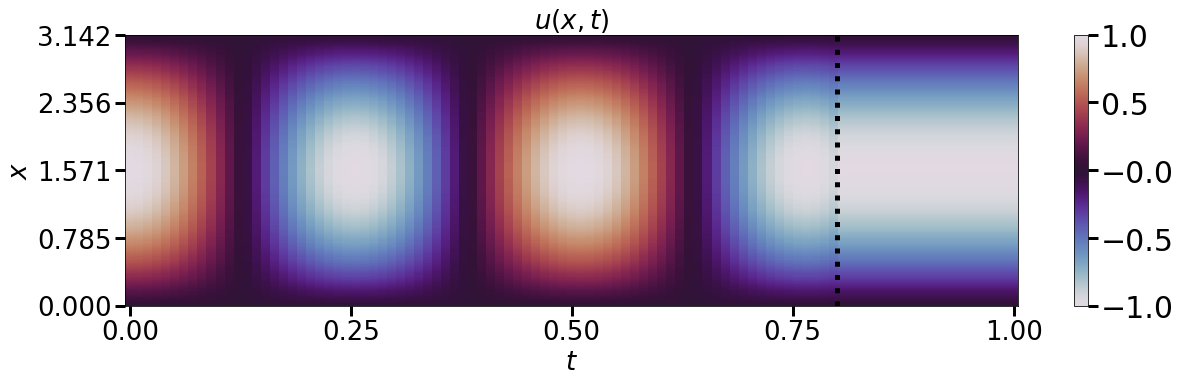

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(0, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x1, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_RNN_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


In [21]:
x = np.linspace(0, np.pi, 256)
t = np.linspace(0, 1, 100)
t[-2]

0.98989898989899

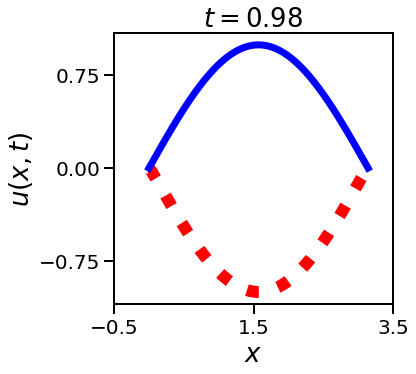

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.98}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-0.5, 1.5, 3.5])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.98_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


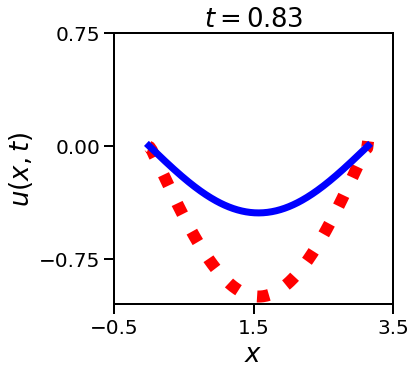

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[83, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.83}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-0.5, 1.5, 3.5])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.83_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
